In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import numpy as np
import pandas as pd 
import requests
from io import BytesIO
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip"

with ZipFile(BytesIO(requests.get(url).content), "r") as myzip:

    with myzip.open("DryBeanDataset/Dry_Bean_Dataset.xlsx", "r") as f:
        df = pd.read_excel(f)
       

In [22]:
df = df.sample(frac=1)

In [23]:
df

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
5007    79627   1087.128       412.880894       246.931618      1.672045   
2135    55773    968.988       347.920243       204.491191      1.701395   
4036    64531    980.585       386.037346       215.965023      1.787499   
3727   185149   1647.795       645.096841       368.587826      1.750185   
12280   33668    690.410       254.971736       168.665188      1.511703   
...       ...        ...              ...              ...           ...   
8122    41774    760.786       285.190676       186.969859      1.525330   
10790   27837    612.740       217.883703       163.532691      1.332356   
11508   30657    640.693       231.231624       169.056966      1.367773   
11090   29123    626.011       229.181056       162.042696      1.414325   
7842    40242    755.512       282.037066       182.045133      1.549270   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
5007       0.801444       80395     318.408928  0.813799  0.990447   0.846660   
2135       0.809040       57047     266.481499  0.765377  0.977668   0.746444   
4036       0.828870       65443     286.641625  0.764151  0.986064   0.843350   
3727       0.820694      186539     485.529637  0.833141  0.992548   0.856890   
12280      0.749940       34064     207.044510  0.781251  0.988375   0.887591   
...             ...         ...            ...       ...       ...        ...   
8122       0.755112       42202     230.625906  0.713171  0.989858   0.906966   
10790      0.660813       28153     188.263563  0.751458  0.988776   0.931708   
11508      0.682254       30983     197.569493  0.733597  0.989478   0.938511   
11090      0.707163       29432     192.563120  0.797628  0.989501   0.933861   
7842       0.763790       40729     226.357473  0.805549  0.988043   0.885945   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
5007      0.771188      0.005185      0.001131      0.594731      0.994418   
2135      0.765927      0.006238      0.001324      0.586644      0.998113   
4036      0.742523      0.005982      0.001122      0.551340      0.985521   
3727      0.752646      0.003484      0.000690      0.566476      0.991438   
12280     0.812029      0.007573      0.002031      0.659392      0.996804   
...            ...           ...           ...           ...           ...   
8122      0.808673      0.006827      0.001801      0.653951      0.997492   
10790     0.864055      0.007827      0.002691      0.746592      0.994725   
11508     0.854422      0.007543      0.002480      0.730038      0.998526   
11090     0.840223      0.007869      0.002419      0.705974      0.998477   
7842      0.802581      0.007009      0.001794      0.644136      0.997940   

          Class  
5007       CALI  
2135   BARBUNYA  
4036       CALI  
3727     BOMBAY  
12280  DERMASON  
...         ...  
8122       SIRA  
10790  DERMASON  
11508  DERMASON  
11090  DERMASON  
7842       SIRA  

[13611 rows x 17 columns]

In [24]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

class pre_process_standardize:
    def __init__(self,X):
        self.mean = None
        self.X = X
    def fit(self):
        self.mean = np.mean(X,axis = 0)
        self.std = np.std(self.X, axis = 0)
        return (self.X - self.mean) / self.std
    
    def transform(self,X):
        return (X - self.mean ) / self.std
    
pre_process_model = pre_process_standardize(X_train)
X_train_pre_process =  pre_process_model.fit()
X_test_pre_process = pre_process_model.transform(X_test)

data frame for analysis (df_analysis)

In [25]:
df_analysis = pd.DataFrame(X_train_pre_process, columns = df.columns[:-1])
df_analysis['Class'] = y_train

In [26]:
df_test_analysis = pd.DataFrame(X_test_pre_process, columns = df.columns[:-1])
df_test_analysis['Class'] = y_test

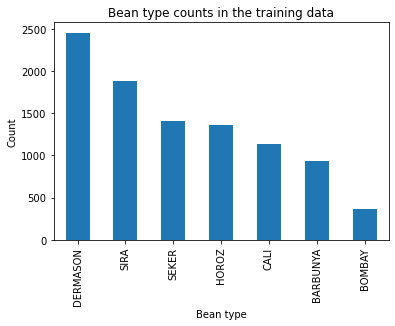

In [27]:
df_analysis["Class"].value_counts().plot(kind='bar',
                                   title= "Bean type counts in the training data",
                                   xlabel= 'Bean type',
                                   ylabel= 'Count');

There's an imbalance between the count of each class. <br>
Dermason is the most frequent class. (2496) <br>
Bombay is the least frequent class. (365) <br>
There's a big difference between the 2 classes, which should to be taken into account when building a model.

## 1. Univariate Analysis

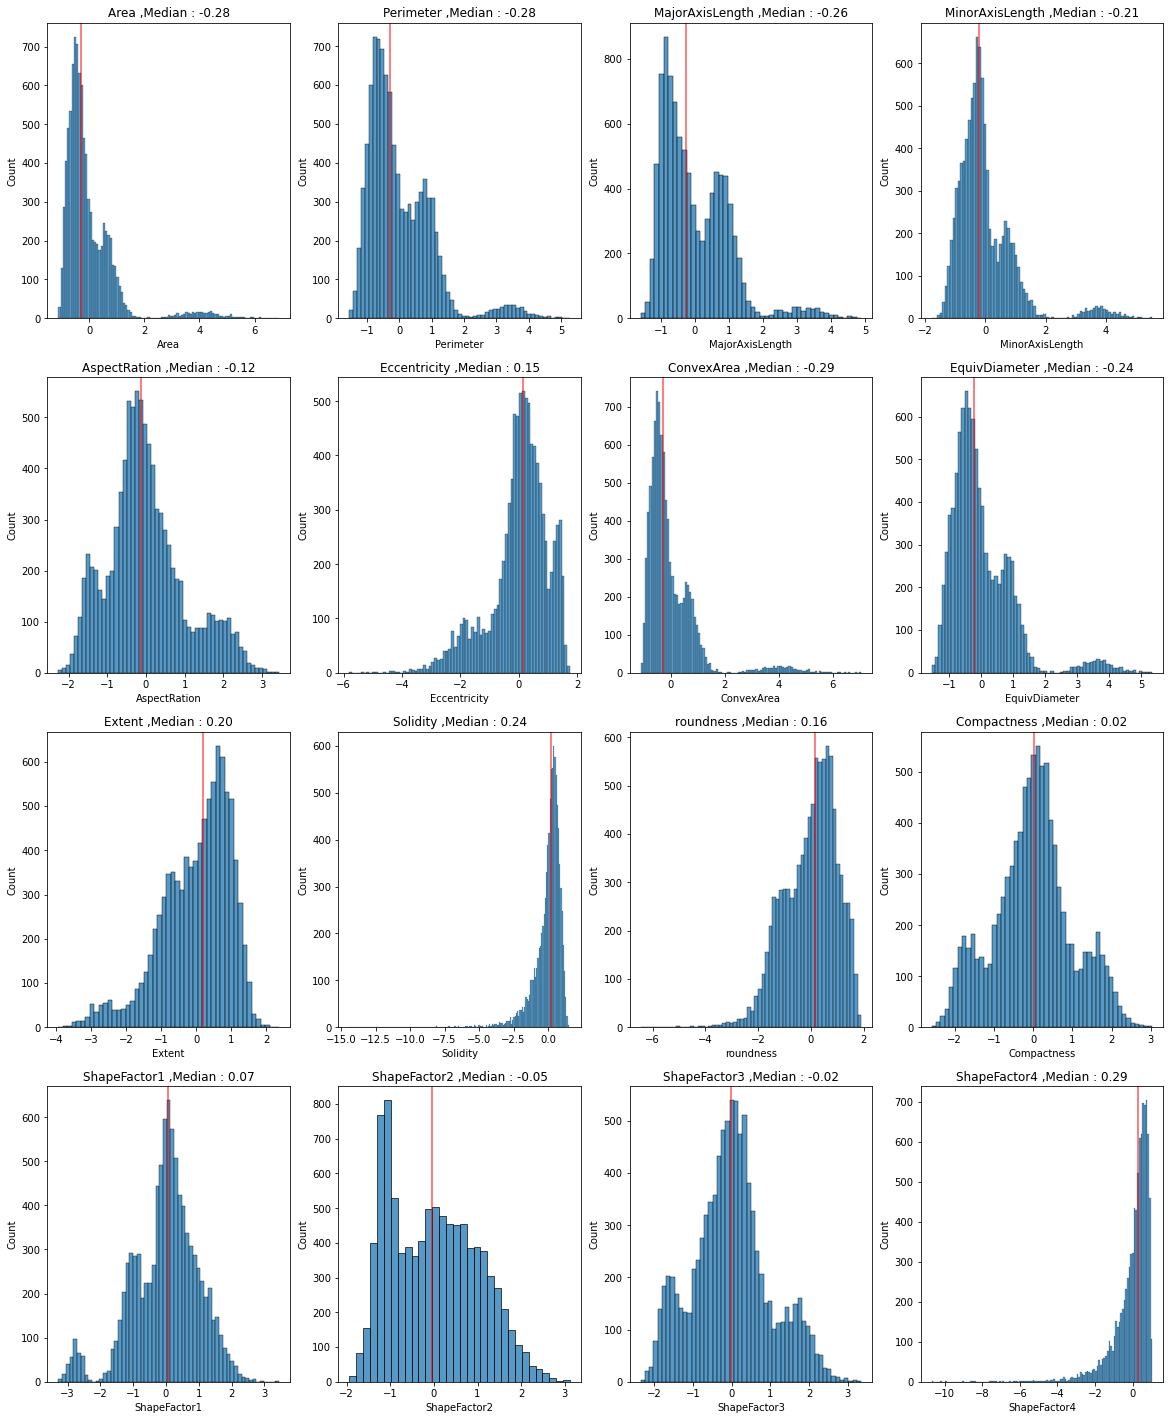

In [28]:
fig, axes = plt.subplots(4, 4, figsize=(20, 25))
for feature, ax in zip(df_analysis.iloc[:,:-1], axes.flatten()):
    sns.histplot(data=df_analysis[feature],ax=ax)
    median = df_analysis[feature].median()
    ax.set_title( f'{feature} ,Median : {median:0.2f}')
    ax.axvline(median,
               color ='red', 
               lw=2, 
               alpha=0.5)
plt.show()

Many features show skewness and outliers in their distribution, these points may resemble a unique class of dry beans. <br>
We should investegate the distribution of each feature with respect to the classes of the dry beans.

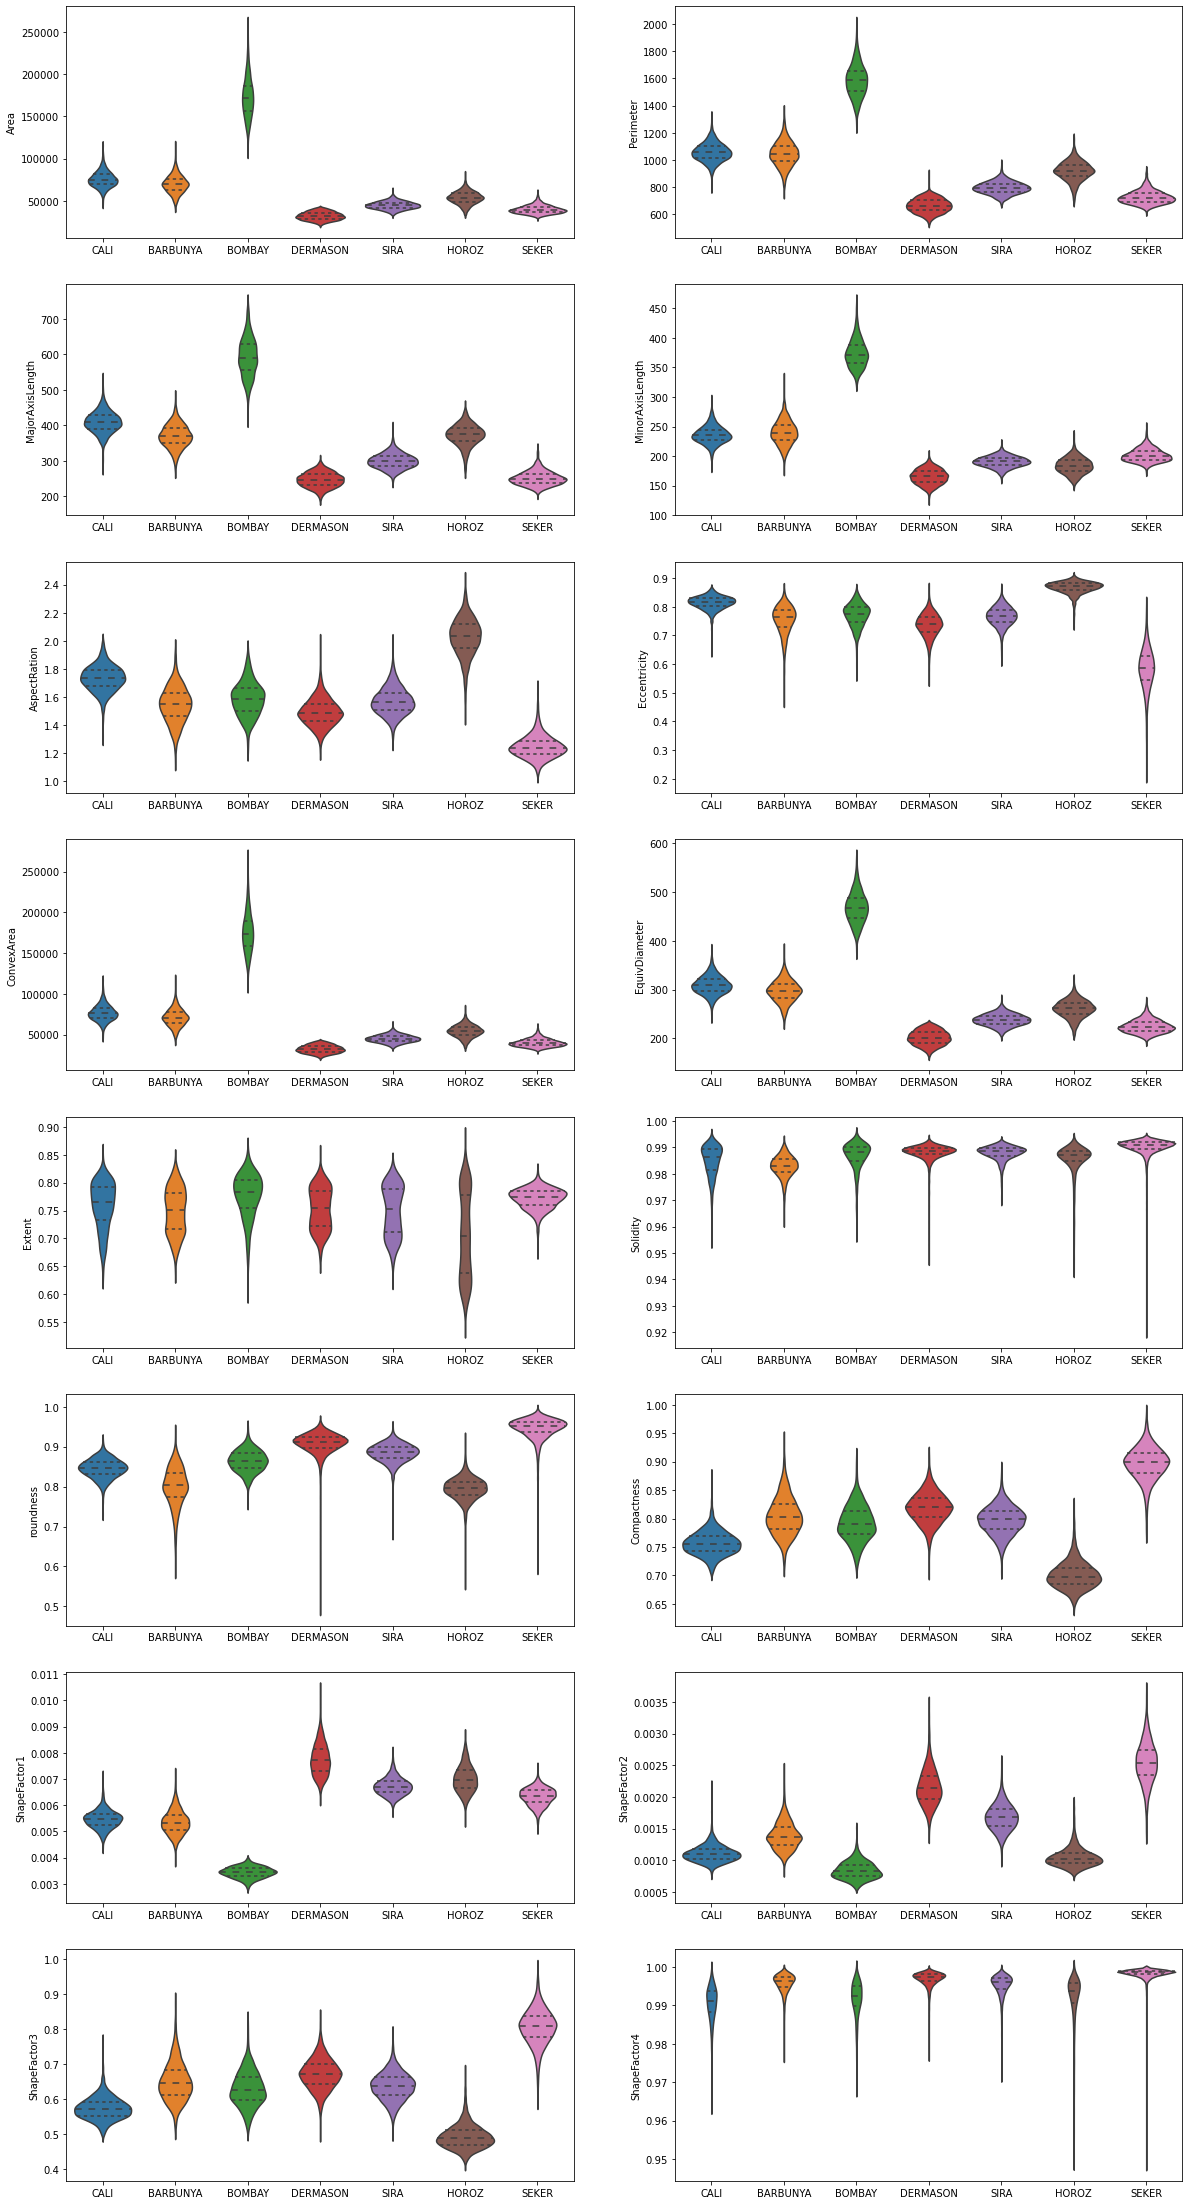

In [29]:
fig, axes = plt.subplots(8, 2, figsize = (20, 40))
for feature, ax in zip(df_analysis.iloc[:,:-1], axes.flatten()):
    sns.violinplot(data=df,
                   x="Class",
                   y=feature,
                   inner="quartile",
                   ax=ax)
    ax.set(xlabel=None)
plt.show()

Some features have a very skewed distribution with long tails (eccentricity, solidity, roundness, shape factor2, shape factor4) <br>
Bombay class differs greatly from other classes, it has a larger area and perimeter, and can be clearly distinguished from other classes based on Minor Axis Length and Shape Factor 1. <br>

## 2. Multi Variate Analysis

<AxesSubplot:>

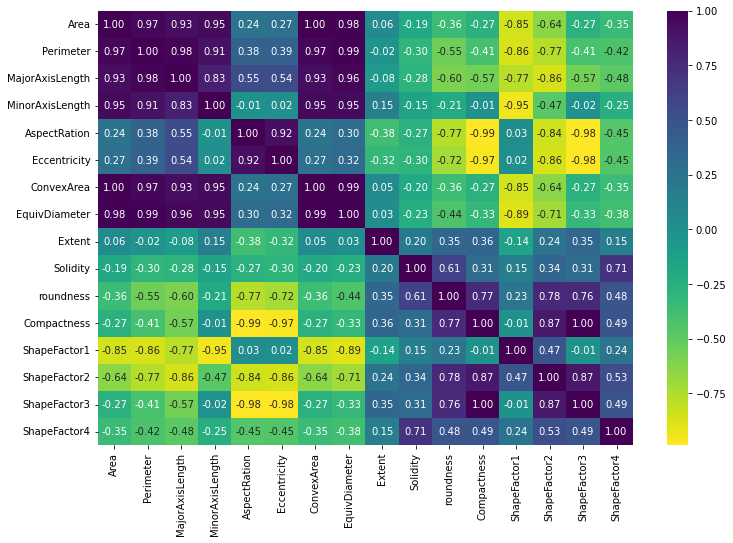

In [30]:
plt.figure(figsize = [12, 8])
sns.heatmap(df_analysis.corr(),annot = True, cmap = 'viridis_r', fmt = '.2f')

 There are lot of linearly correlated features:

area & convex area : 1.00 <br>
compactness & shape factor 3 : 1.00 <br>
equivalent diameter & convex area: 0.99 <br>
convex area & perimeter : 0.97 <br>
minor axis length & convex area : 0.95 <br>
aspect ration & compactness : -0.99 <br>
eccentricity & shape factor 3 : -0.98 <br>


## 3. Analysing data using Feature selection methods 

### 3.1. Uni-Variate Feature Selection 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
X = df_analysis.iloc[:,:-1]
y = df_analysis.iloc[:,-1:]

#### 3.1.1. Mutual information 

<br>
Mutual information between two random variables is a non-negative value, which measures the dependency between the variables. <br> It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [32]:
import matplotlib.pyplot as plt 
# compares with target variable to select the features 
# higher values represents higher dependency on target variable 

def select_feature_MI(X_train, y_train):
    
    Sb = SelectKBest(score_func = mutual_info_classif, k = 'all')
    Sb.fit(X_train,y_train)
    X_train = Sb.transform(X_train)
    return X_train, Sb


X_train_selected,  fs = select_feature_MI(X,y)

selected_features_df = pd.DataFrame({'features': list(X.columns), 
                                    'Scores': fs.scores_})
selected_features_df.sort_values(by='Scores', ascending= False)



C:\Users\sid31\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


features    Scores
1         Perimeter  1.067871
6        ConvexArea  1.044823
7     EquivDiameter  1.028816
0              Area  1.028267
2   MajorAxisLength  1.001809
13     ShapeFactor2  0.951681
3   MinorAxisLength  0.935852
12     ShapeFactor1  0.922989
14     ShapeFactor3  0.826739
11      Compactness  0.826726
4      AspectRation  0.826217
5      Eccentricity  0.826135
10        roundness  0.799553
15     ShapeFactor4  0.369436
9          Solidity  0.234478
8            Extent  0.202892

 we can see that "Solidity","ShapeFactor4","Extent". has the lowest scores, which means less likely to depend on target variable

#### 3.1.2 ANOVA / F-value 




F-test estimate the degree of linear dependency between feature and target variable.

In [33]:
def select_feature_f(X_train, y_train):
    
    Sb = SelectKBest(score_func = f_classif, k = 'all')
    Sb.fit(X_train,y_train)
    X_train = Sb.transform(X_train)
    return X_train, Sb


X_train_selected_f, fs_f = select_feature_f(X,y)

selected_features_df = pd.DataFrame({'features': list(X.columns), 
                                    'Scores': fs_f.scores_})
selected_features_df.sort_values(by='Scores', ascending= False)

C:\Users\sid31\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


features        Scores
0              Area  20093.193004
6        ConvexArea  20043.823605
7     EquivDiameter  17722.185501
1         Perimeter  16938.382829
3   MinorAxisLength  15626.225272
2   MajorAxisLength  15121.210401
13     ShapeFactor2   8660.621660
12     ShapeFactor1   8503.095689
4      AspectRation   7296.749206
11      Compactness   7156.021047
14     ShapeFactor3   6971.633573
5      Eccentricity   5830.942393
10        roundness   4294.236880
15     ShapeFactor4    866.769245
9          Solidity    428.943098
8            Extent    307.454134

F-test estimate the degree of linear dependency between two random variables. <br> On the other hand, mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.

both f-test and mutual information has the lowest scores for "Solidity","ShapeFactor4" and "Extent"

## 4. Model based feature selection 


There are many ways features can be selected using a model in which L1 penality is one of them 

### L1 penalising for feature selection 
<br>
we considered L1 penality to reduce the dimensions of the data using linear_SVM, in linear_SVM the parameter C decides the level of penality to be imposed, that is if C is lower fewer feature will be selected 

In [34]:
X.shape

(9527, 16)

In [35]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_model_based = model.transform(X)
X_model_based.shape

C:\Users\sid31\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sid31\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


(9527, 13)

with C being 0.01 , the dimensions are reduced from 16 to 13 

## 3.1.3 Dropping features based on uni-variate feature selection methods

In [36]:
df_UV = df_analysis
df_UV.drop(['ShapeFactor4','Solidity', 'Extent'], axis=1, inplace=True)

<AxesSubplot:>

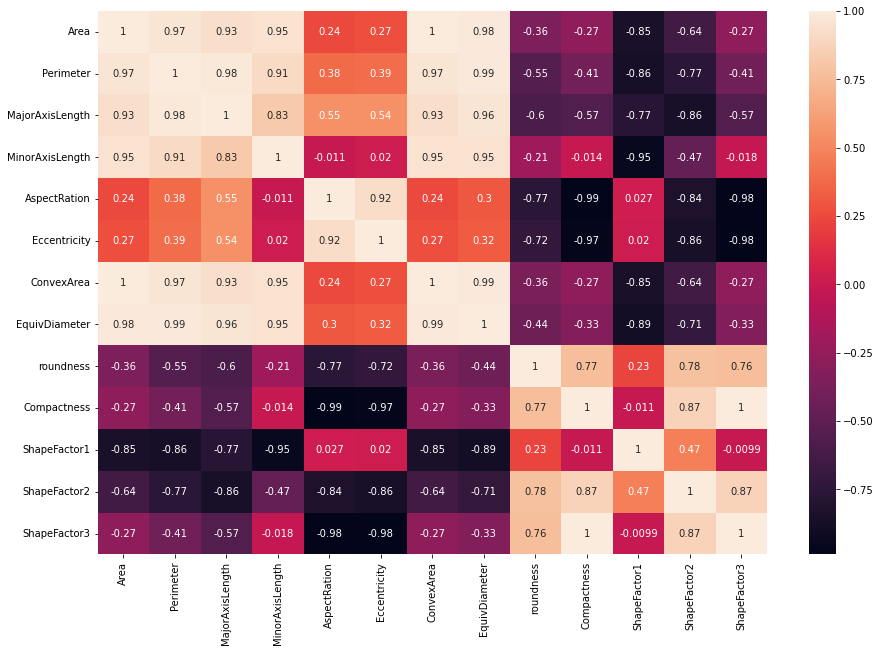

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(df_UV.corr(),annot=True)

There are still some highly correlated features like Area and Convex Area, compactness and shape factor 3 <br>
by univariate analysis, removing the feature which have lower scores 

In [38]:
df_UV.drop(['ShapeFactor3','ConvexArea'], axis=1, inplace=True)

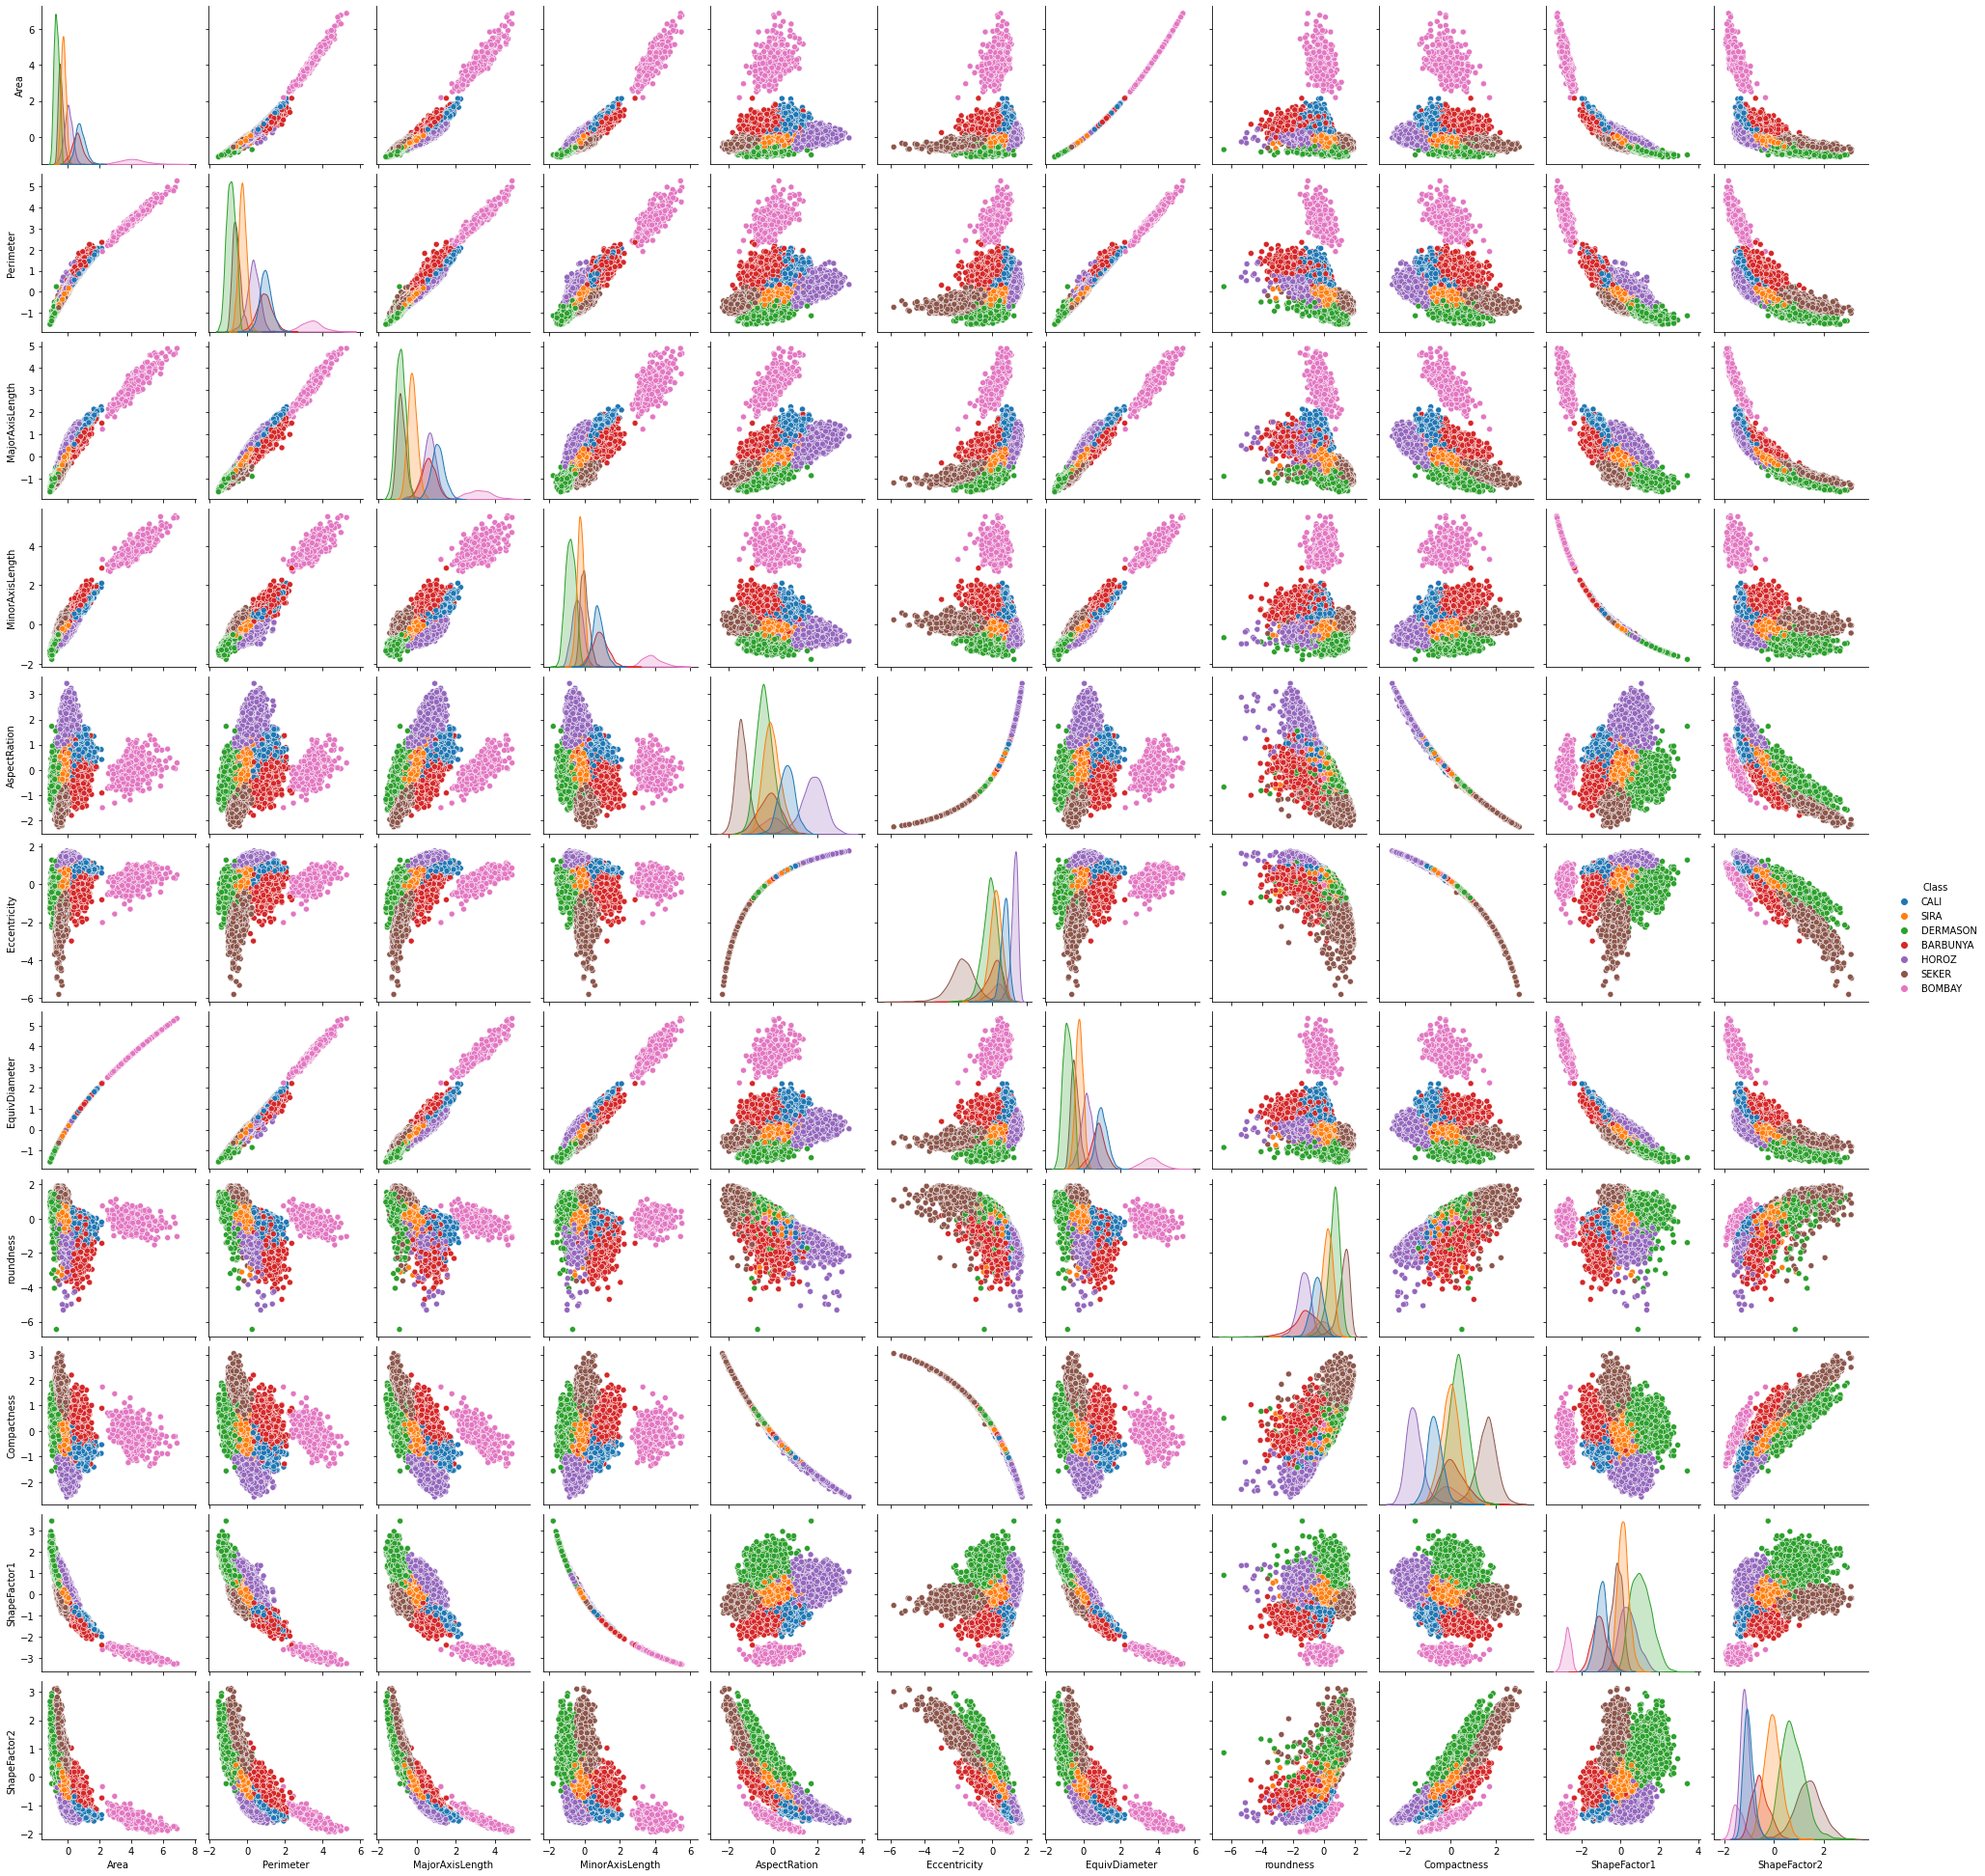

In [39]:
sns.pairplot(df_UV, hue="Class")

We can see a linear trend between many features. <br>
Notice that Bombay class is mostly separated from other classes in some features, which means that despite having low count in the dataset, a model may still be able to correctly classify it. <br>
The classes are clearly clustered within some scatterplots, mainly between the area and perimeter features with all other features. <br>
Even though we can see clusters for each class, there's some overlap between them, mainly between Dermason and Sira classes. <br>
Some features (aspect ration, eccentricity, compactness) seems to hit a bound when plotted against roundness , which indicates that (in the given data) no outliers occur above that bound. <br>

most of the classes are linearly sepereable with respect to features <br>
we can use SVM_linear and Naive Bayes as algorithms for linearly seperable data <br>
but there are also some non linear trends observed in the data with respect to features <br>
so we tried KNN, multinomial logistic(softmax) and Neural Networks

In [40]:
# data set for Univariate feature selction 
X_train_UV = df_UV.iloc[:,:-1]
y_train_UV = df_UV.iloc[:,-1:]
X_test_UV = df_test_analysis.drop(['ShapeFactor4','Solidity', 'Extent','ShapeFactor3','ConvexArea'], axis=1).iloc[:,:-1]
y_test_UV = df_test_analysis['Class'].values.reshape(df_test_analysis['Class'].shape[0],1)


In [43]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False, categories='auto')
y_train_UV = enc.fit_transform(y_train_UV.values.reshape(len(y_train_UV), -1))
y_test_UV = enc.transform(y_test_UV.reshape(len(y_test_UV), -1))
print("UV x train shape",X_train_UV.shape)
print("UV y train shape",y_train_UV.shape)
print("UV x test shape",X_test_UV.shape)
print("UV y test shape",y_test_UV.shape)

UV x train shape (9527, 11)
UV y train shape (9527, 7)
UV x test shape (4084, 11)
UV y test shape (4084, 7)


In [44]:
# data set for model based feature selection 

X_train_model_based = X_model_based
y_train_model_based = y
X_test_model_based = model.transform(X_test)
y_test_model_based = y_test

In [45]:
enc = OneHotEncoder(sparse=False, categories='auto')
y_train_model_based = enc.fit_transform(y_train_model_based.values.reshape(len(y_train_model_based), -1))
print("model x train shape",X_train_model_based.shape)
print("model y train shape",y_train_model_based.shape)
print("model x test shape",X_test_model_based.shape)
print("model y test shape",y_test_model_based.shape)

model x train shape (9527, 13)
model y train shape (9527, 7)
model x test shape (4084, 13)
model y test shape (4084, 1)


## 5. Dimnesionality Reduction

### 5.1. Dimensionality reduction using PCA

In [46]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
    
    def fit(self,X):
        cov = np.cov(X.T)
        eigVal, eigVec = np.linalg.eig(cov)
        u , s, v = np.linalg.svd(cov)
        eigVec= eigVec.T
        
        ids = np.argsort(eigVal)[::-1]
        eigVal = eigVal[ids]
        eigVec = eigVec[ids]
        
        self.components = eigVec[0:self.n_components]
        plt.bar(range(X.shape[1]), s, color ='maroon',width = 0.4)
        plt.xlabel("components")
        plt.ylabel("% variance retained")
        plt.title("variance VS components")
        plt.show()
    def transform(self,X):
        return np.dot(X, self.components.T)
    

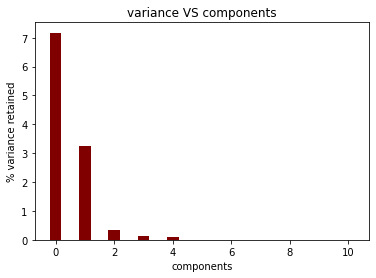

In [47]:
model_PCA = PCA(n_components = 2)
model_PCA.fit(X_train_UV)
X_train_UV_pca = model_PCA.transform(X_train_UV)
X_test_UV_pca = model_PCA.transform(X_test_UV)

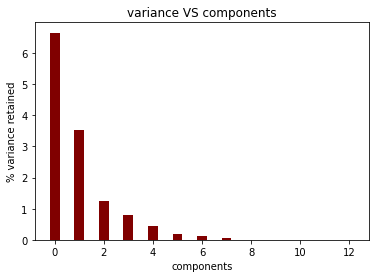

In [48]:
model_PCA1 = PCA(n_components = 4)
model_PCA1.fit(X_train_model_based)
X_train_model_based_pca = model_PCA1.transform(X_train_model_based)
X_test_model_based_pca = model_PCA1.transform(X_test_model_based)

### 5.2. Dimensionality reduction using Variational AutoEncoders 

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import nn, optim
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
from sklearn import preprocessing


In [50]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [51]:
def load_data(df):
    df_base = df
    x = df_base.values.reshape(-1, df_base.shape[1]).astype('float32')
    # stadardize values
    standardizer = preprocessing.StandardScaler()
    x = standardizer.fit_transform(x)    
    return x, standardizer

In [52]:
def numpyToTensor(x):
    x_train = torch.from_numpy(x).to(device)
    return x_train

In [53]:
class DataBuilder(Dataset):
    def __init__(self, path):
        self.x, self.standardizer = load_data(path)
        self.x = torch.from_numpy(self.x)
        self.len=self.x.shape[0]
    def __getitem__(self,index):      
        return self.x[index]
    def __len__(self):
        return self.len

In [54]:
data_set=DataBuilder(X_train_UV)
trainloader=DataLoader(dataset=data_set,batch_size=1024)

In [55]:
type(trainloader.dataset.x)

torch.Tensor

In [56]:
data_set.x

tensor([[ 0.6434,  0.8384,  0.9052,  ..., -0.6326, -0.9122, -0.9595],
        [-0.0878, -0.0292,  0.0659,  ..., -0.3513, -0.0969, -0.4291],
        [-0.2293, -0.1483, -0.0518,  ..., -0.4940,  0.2210, -0.4079],
        ...,
        [-0.3395, -0.3609, -0.3867,  ...,  0.2648,  0.0834,  0.1791],
        [-0.8184, -1.0243, -0.9932,  ...,  0.3046,  1.3397,  0.8753],
        [ 0.0522,  0.1667,  0.3325,  ..., -0.7077, -0.1553, -0.7167]])

In [57]:
class Autoencoder(nn.Module):
    def __init__(self,D_in,H=50,H2=12,latent_dim=5):
        
        #Encoder
        super(Autoencoder,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.lin_bn1 = nn.BatchNorm1d(num_features=H)
        self.linear2=nn.Linear(H,H2)
        self.lin_bn2 = nn.BatchNorm1d(num_features=H2)
        self.linear3=nn.Linear(H2,H2)
        self.lin_bn3 = nn.BatchNorm1d(num_features=H2)
        
#         # Latent vectors mu and sigma
        self.fc1 = nn.Linear(H2, latent_dim)
        self.bn1 = nn.BatchNorm1d(num_features=latent_dim)
        self.fc21 = nn.Linear(latent_dim, latent_dim)
        self.fc22 = nn.Linear(latent_dim, latent_dim)

#         # Sampling vector
        self.fc3 = nn.Linear(latent_dim, latent_dim)
        self.fc_bn3 = nn.BatchNorm1d(latent_dim)
        self.fc4 = nn.Linear(latent_dim, H2)
        self.fc_bn4 = nn.BatchNorm1d(H2)
        
#         # Decoder
        self.linear4=nn.Linear(H2,H2)
        self.lin_bn4 = nn.BatchNorm1d(num_features=H2)
        self.linear5=nn.Linear(H2,H)
        self.lin_bn5 = nn.BatchNorm1d(num_features=H)
        self.linear6=nn.Linear(H,D_in)
        self.lin_bn6 = nn.BatchNorm1d(num_features=D_in)
        
        self.relu = nn.ReLU()
        
    def encode(self, x):
        lin1 = self.relu(self.lin_bn1(self.linear1(x)))
        lin2 = self.relu(self.lin_bn2(self.linear2(lin1)))
        lin3 = self.relu(self.lin_bn3(self.linear3(lin2)))

        fc1 = F.relu(self.bn1(self.fc1(lin3)))

        r1 = self.fc21(fc1)
        r2 = self.fc22(fc1)
        
        return r1, r2
    
    def reparameterize(self, mu, logvar):
        if self.training:
            std = logvar.mul(0.5).exp_()
            eps = Variable(std.data.new(std.size()).normal_())
            return eps.mul(std).add_(mu)
        else:
            return mu
        
    def decode(self, z):
        fc3 = self.relu(self.fc_bn3(self.fc3(z)))
        fc4 = self.relu(self.fc_bn4(self.fc4(fc3)))

        lin4 = self.relu(self.lin_bn4(self.linear4(fc4)))
        lin5 = self.relu(self.lin_bn5(self.linear5(lin4)))
        return self.lin_bn6(self.linear6(lin5))


        
    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        # self.decode(z) ist später recon_batch, mu ist mu und logvar ist logvar
        return self.decode(z), mu, logvar

In [58]:
class customLoss(nn.Module):
    def __init__(self):
        super(customLoss, self).__init__()
        self.mse_loss = nn.MSELoss(reduction="sum")
    
    def forward(self, x_recon, x, mu, logvar):
        loss_MSE = self.mse_loss(x_recon, x)
        loss_KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

        return loss_MSE + loss_KLD

In [59]:
def weights_init_uniform_rule(m):
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # get the number of the inputs
        n = m.in_features
        y = 1.0/np.sqrt(n)
        m.weight.data.uniform_(-y, y)
        m.bias.data.fill_(0)

In [60]:
D_in = data_set.x.shape[1]
H = 50
H2 = 12
model = Autoencoder(D_in, H, H2).to(device)
#model.apply(weights_init_uniform_rule)
#sae.fc4.register_forward_hook(get_activation('fc4'))
optimizer = optim.Adam(model.parameters(), lr=3e-4)

In [61]:
loss_mse = customLoss()

In [62]:
epochs = 1500
log_interval = 50
val_losses = []
train_losses = []

In [63]:
def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, X_train_UV in enumerate(trainloader):
        data = X_train_UV.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_mse(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
#        if batch_idx % log_interval == 0:
#            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
#                epoch, batch_idx * len(data), len(trainloader.dataset),
#                       100. * batch_idx / len(trainloader),
#                       loss.item() / len(data)))
    if epoch % 200 == 0:        
        print('====> Epoch: {} Average loss: {:.4f}'.format(
            epoch, train_loss / len(trainloader.dataset)))
        train_losses.append(train_loss / len(trainloader.dataset))

In [64]:
for epoch in range(1, epochs + 1):
    train(epoch)

====> Epoch: 200 Average loss: 3.6108
====> Epoch: 400 Average loss: 3.3244
====> Epoch: 600 Average loss: 3.2996
====> Epoch: 800 Average loss: 3.2895
====> Epoch: 1000 Average loss: 3.2697
====> Epoch: 1200 Average loss: 3.2535
====> Epoch: 1400 Average loss: 3.2329


In [65]:
standardizer = trainloader.dataset.standardizer

In [66]:
model.eval()
test_loss = 0

with torch.no_grad():
    for i, data in enumerate(trainloader):
        data = data.to(device)
        recon_batch, mu, logvar = model(data)

In [67]:
standardizer.inverse_transform(recon_batch[65].cpu().numpy())

array([-0.64067715, -0.813417  , -0.7830504 , -0.6904789 , -0.4560943 ,
       -0.215093  , -0.7710272 ,  0.65912366,  0.3917534 ,  0.817607  ,
        0.6912644 ], dtype=float32)

In [68]:
standardizer.inverse_transform(data[65].cpu().numpy())

array([-0.68649524, -0.8422558 , -0.85317224, -0.718254  , -0.5247555 ,
       -0.27342638, -0.8161039 ,  0.5964697 ,  0.4694158 ,  0.8304945 ,
        0.78539145], dtype=float32)

In [69]:
mu_output = []
logvar_output = []

with torch.no_grad():
    for i, (data) in enumerate(trainloader):
            data = data.to(device)
            optimizer.zero_grad()
            recon_batch, mu, logvar = model(data)

            
            mu_tensor = mu   
            mu_output.append(mu_tensor)
            mu_result = torch.cat(mu_output, dim=0)

            logvar_tensor = logvar   
            logvar_output.append(logvar_tensor)
            logvar_result = torch.cat(logvar_output, dim=0)

In [70]:
mu_result.shape

torch.Size([9527, 5])

In [71]:
df_VAE = mu_result.cpu().numpy()

In [72]:
mu_output_test = []
logvar_output_test = []
data_set_test=DataBuilder(X_test_UV)
trainloader1=DataLoader(dataset=data_set_test,batch_size=1024)
with torch.no_grad():
    for i, (data) in enumerate(trainloader1):
            data = data.to(device)
            optimizer.zero_grad()
            recon_batch, mu, logvar = model(data)

            
            mu_tensor = mu   
            mu_output_test.append(mu_tensor)
            mu_result_test = torch.cat(mu_output_test, dim=0)

            logvar_tensor = logvar   
            logvar_output_test.append(logvar_tensor)
            logvar_result_test = torch.cat(logvar_output_test, dim=0)

In [73]:
mu_result_test.shape

torch.Size([4084, 5])

Variational AutoEncoder data for uni-variate feature selection menthods 

In [74]:
VAE_X_train = mu_result.cpu().numpy()
VAE_X_test = mu_result_test.cpu().numpy()
VAE_y_train = y_train_UV
VAE_y_test = y_test_UV

so, basically we have 2 kinds of data now <br>
uni-variate feature selection with PCA data <br>
uni-variate feature selection with Variational AutoEncoder data <br>


## 6.Models

### 6.1 Multinomial Logistic Regression

In [75]:
#data set 
#X_train_UV_pca
#y_train_UV
#X_test_UV_pca
#y_test_UV

In [76]:
class logit:

    def __init__(self,X_train,y_train,X_test,y_test, reg,reg_param, learning_rate = 0.00001, tol = 0.00005, maxIter = 50000):

        self.X_train = X_train
        self.y_train = y_train
        self.X_test= X_test
        self.y_test = y_test
        self.learning_rate = learning_rate
        self.tol = tol
        self.maxIter = maxIter
        self.error = []
        self.iter_count = []
        self.reg = reg
        self.reg_param = reg_param
        #self.sgd = sgd

    def addBias(self,X):
        return np.column_stack([np.ones([X.shape[0],1]),X])
    
    
    def softmax(self,z):
        z = z - np.max(z)
        z = np.exp(z)
        return np.divide(z , z.sum(axis=0)) 
    
    def costFunction(self,X,y):
        y_hat = self.softmax(X.dot(self.w)) # y_hat = predicted labels 
        cost  = - np.sum(np.log(y_hat) * y, axis=1) # - sum(  y * log ( y_hat )  )
        if self.reg: 
          cost  = cost + (self.reg_param * ( np.sum(np.square(self.w)) ) )
        return 0.5* np.mean(cost)

    def gradient(self,X,y):
        #print(y)
        softmax = self.softmax(X.dot(self.w))
        grad_w = X.T.dot(softmax - y)
        #print(grad.shape)
        #grad_b = np.sum(softmax - y)
        return grad_w / X.shape[0] 

    def gradientDescent(self,X,y):
        prev_error = float('inf')
        print(y.shape)
        for i in tqdm(range(self.maxIter)):
            W  = self.gradient(X,y)
            if self.reg: # L2 regularisation 
              w_update = self.w * (1 - self.learning_rate *( self.reg_param / X.shape[0]))
              self.w  = w_update - (self.learning_rate  * W) 
            else: 
            
              self.w = self.w - self.learning_rate * W
            curr = self.costFunction(X,y)
            self.error.append(curr)
            self.iter_count.append(i)
            diff = prev_error - curr
            prev_error= curr

            if abs(diff) < self.tol:
                print("stopped")
                break
        print("trian error:", curr)
        #self.plot()
            #break
        #plot function 
      
    
    #change
    def predict(self,X):
        np.column_stack([np.ones([X.shape[0],1]),X])
        pred = self.softmax(X.dot(self.w))
        return pred
    
    
    # change
    def evaluate(self,y,y_hat):
        #print(y.shape)
        #print(y_hat.shape)
        y = np.argmax(y, axis = 1)
        y_hat = np.argmax(y_hat, axis = 1)
        accuracy = np.mean(y==y_hat) #.sum() / y.size
        #precision = (y&y_hat).sum() / y_hat.sum()
        #recall = (y&y_hat).sum() / y.sum()
        
        return  accuracy
    
    
    def fit(self):
 
        self.addBias(self.X_train) 
        #self.addBias(self.X_test)
        # random weights with shape x_train.shape[1], y_train.shape[1]
        #self.b = np.zeros((self.y_train.shape[0],1))
        self.w = np.random.randn(self.X_train.shape[1], self.y_train.shape[1]) * (2 / np.sqrt(X_train.shape[0]))
        #print(self.w.shape)
        self.gradientDescent(self.X_train,self.y_train)
        y_hat = self.predict(self.X_test)
        accuracy = self.evaluate(self.y_test, y_hat)
        print("accuracy:", accuracy)
        test_error = self.costFunction(self.X_test,self.y_test)
        print("test error:" , test_error)
        #print("precision:", precision)
        #print("recall:", recall)
        
    def plot(self, figsize=(7,5)): 
        plt.figure(figsize=figsize)
        plt.plot(self.iter_count,self.error)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()



  

(9527, 7)


 76%|███████▌  | 3027/4000 [00:08<00:02, 341.76it/s]


stopped
trian error: 4.2943415837527175
accuracy: 0.7806072477962782
test error: 3.8718083434931123
(9527, 7)


 69%|██████▉   | 2759/4000 [00:07<00:03, 348.42it/s]


stopped
trian error: 4.279971011192477
accuracy: 0.7524485798237023
test error: 3.858033497134483
(9527, 7)


 51%|█████     | 2049/4000 [00:06<00:05, 337.52it/s]


stopped
trian error: 4.252317778971068
accuracy: 0.7930950048971597
test error: 3.830889156498262
(9527, 7)


 35%|███▌      | 1416/4000 [00:04<00:07, 326.51it/s]


stopped
trian error: 4.246150298934649
accuracy: 0.7894221351616063
test error: 3.825528320177538
(9527, 7)


 28%|██▊       | 1138/4000 [00:03<00:08, 339.73it/s]


stopped
trian error: 4.248894842194674
accuracy: 0.779382957884427
test error: 3.8288720655741746
(9527, 7)


  7%|▋         | 264/4000 [00:00<00:10, 346.18it/s]


stopped
trian error: 4.239873176857023
accuracy: 0.7688540646425074
test error: 3.8203856299092402


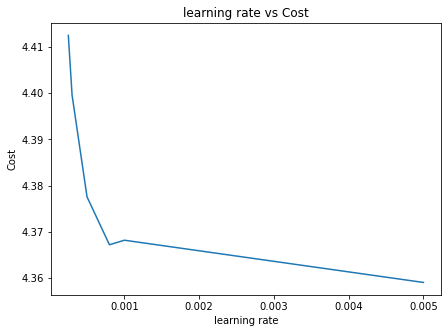

In [77]:
from tqdm import tqdm
lr_error = []
reg_cost = []
reg_param = [0.001,0.005,0.009,0.01,0.15,0.2 ]
learning_rate = [0.00025,0.0003,0.0005,0.0008,0.001,0.005 ]

for j in learning_rate:
    reg_logit = logit(X_train_UV_pca,y_train_UV,X_test_UV_pca,y_test_UV ,reg = True,reg_param = 0.005,learning_rate = j, tol = 0.00005, maxIter = 4000)
    reg_logit.fit()
    lr_error.append(np.mean(reg_logit.error))



plt.figure(figsize=(7,5))
plt.plot(learning_rate,lr_error)
plt.xlabel('learning rate')
plt.ylabel('Cost')
plt.title("learning rate vs Cost")
plt.show()

(9527, 7)


 63%|██████▎   | 2526/4000 [00:07<00:04, 334.14it/s]


stopped
trian error: 4.243302187386686
accuracy: 0.7605288932419196
test error: 3.8242525520895057
(9527, 7)


 63%|██████▎   | 2535/4000 [00:07<00:04, 344.33it/s]


stopped
trian error: 4.245190320583443
accuracy: 0.7639569049951028
test error: 3.8258012677256144
(9527, 7)


 61%|██████    | 2431/4000 [00:07<00:04, 330.69it/s]


stopped
trian error: 4.24878049238246
accuracy: 0.7798726738491675
test error: 3.8294893670682986
(9527, 7)


 64%|██████▎   | 2549/4000 [00:07<00:04, 331.92it/s]


stopped
trian error: 4.243362926846658
accuracy: 0.7769343780607247
test error: 3.8236986108701627
(9527, 7)


 43%|████▎     | 1707/4000 [00:04<00:06, 344.32it/s]


stopped
trian error: 4.337456769401206
accuracy: 0.7837904015670911
test error: 3.9156745616081037
(9527, 7)


 40%|███▉      | 1597/4000 [00:04<00:07, 332.28it/s]


stopped
trian error: 4.361683160867427
accuracy: 0.7678746327130265
test error: 3.939492759319268


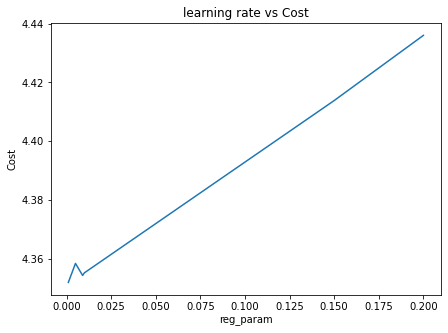

In [78]:
reg_cost = []
for j in reg_param:
    reg_logit = logit(X_train_UV_pca,y_train_UV,X_test_UV_pca,y_test_UV ,reg = True,reg_param = j,learning_rate = 0.0005, tol = 0.000005, maxIter = 4000)
    reg_logit.fit()
    reg_cost.append(np.mean(reg_logit.error))
    

plt.figure(figsize=(7,5))
plt.plot(reg_param,reg_cost)
plt.xlabel('reg_param')
plt.ylabel('Cost')
plt.title("learning rate vs Cost")
plt.show()

### 6.2 Support Vector machine

In [79]:
class KernelSvmClassifier:
    
    def __init__(self, C, kernel):
        self.C = C                               
        self.kernel = kernel          # <---
        self.alpha = None
        self.supportVectors = None
    
    def fit(self, X, y):
        N = len(y)
        # --->
        # Gram matrix of h(x) y
        hXX = np.apply_along_axis(lambda x1 : np.apply_along_axis(lambda x2:  self.kernel(x1, x2), 1, X),
                                  1, X)   
        yp = y.reshape(-1, 1)
        GramHXy = hXX * np.matmul(yp, yp.T) 
        # <---

        # Lagrange dual problem
        def Ld0(G, alpha):
            return alpha.sum() - 0.5 * alpha.dot(alpha.dot(G))

        # Partial derivate of Ld on alpha
        def Ld0dAlpha(G, alpha):
            return np.ones_like(alpha) - alpha.dot(G)

        # Constraints on alpha of the shape :
        # -  d - C*alpha  = 0
        # -  b - A*alpha >= 0
        A = np.vstack((-np.eye(N), np.eye(N)))             # <---
        b = np.hstack((np.zeros(N), self.C * np.ones(N)))  # <---
        constraints = ({'type': 'eq',   'fun': lambda a: np.dot(a, y),     'jac': lambda a: y},
                       {'type': 'ineq', 'fun': lambda a: b - np.dot(A, a), 'jac': lambda a: -A})

        # Maximize by minimizing the opposite
        optRes = optimize.minimize(fun=lambda a: -Ld0(GramHXy, a),
                                   x0=np.ones(N), 
                                   method='SLSQP', 
                                   jac=lambda a: -Ld0dAlpha(GramHXy, a), 
                                   constraints=constraints)
        self.alpha = optRes.x
        # --->
        epsilon = 1e-8
        supportIndices = self.alpha > epsilon
        self.supportVectors = X[supportIndices]
        self.supportAlphaY = y[supportIndices] * self.alpha[supportIndices]
        # <---
    
    def predict(self, X):
        """ Predict y values in {-1, 1} """
        # --->
        def predict1(x):
            x1 = np.apply_along_axis(lambda s: self.kernel(s, x), 1, self.supportVectors)
            x2 = x1 * self.supportAlphaY
            return np.sum(x2)
        
        d = np.apply_along_axis(predict1, 1, X)
        return 2 * (d > 0) - 1
def GRBF(x1, x2):
    diff = x1 - x2
    return np.exp(-np.dot(diff, diff) * len(x1) / 2)

In [80]:
def one_vs_all(X_train,y_train,X_test, y_test):
    noc = y_train.shape[1]
    m = X_train.shape[1]
    k = X_test.shape[1]
    
    cls_y_train = np.argmax(y_train, axis = 1)
    cls_y_test =  np.argmax(y_test, axis = 1)
    all_cls = np.unique(cls_y_train)
    #print(cls)
    for coi in all_cls:
        for i in range(len(cls_y_train)):
            if cls_y_train[i] == coi:
                cls_y_train[i] = 1
            else: 
                cls_y_train[i] = -1
        for i in range(len(cls_y_test)):
            if cls_y_test[i] == coi:
                cls_y_test[i] = 1
            else: 
                cls_y_test[i] = -1     
        svm = KernelSvmClassifier(C = 1,kernel=GRBF)
        svm.fit(X_train[:1000,:],cls_y_train[:1000])

        y_pred = svm.predict(X_test[:100,:])
        #print(y_pred.shape)
        correct = np.sum(y_pred == cls_y_test[:100])
        print("%d corrcted out of %d:" %(correct, len(y_pred)))

        break
    #return cls


In [81]:
#data set 
#X_train_UV_pca
#y_train_UV
#X_test_UV_pca
#y_test_UV
from scipy import optimize
one_vs_all(X_train_UV_pca,y_train_UV,X_test_UV_pca, y_test_UV)

92 corrcted out of 100:


### 6.3 Neural Networks

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import math 
from datetime import datetime
from sklearn.metrics import confusion_matrix

class DNN:
    
    def __init__(self,layer_dims,optim = None, reg = None, lambd = 0, mini_batch_size = 64):
        self.layer_dims = layer_dims
        self.costs= []
        self.iter_count = []
        self.reg = reg
        self.lambd = lambd
        self.optim = optim
        self.v_bias_correction = {}
        self.s_bias_correction = {}
        self.mini_batch_size = mini_batch_size 
        self.accuracy = None
        
    def sigmoid(self,Z):
        A = 1/(1+np.exp(-Z))
        cache = Z
        return A, cache

    def relu(self,Z):
        A = np.maximum(0,Z)
        assert(A.shape == Z.shape)
        cache = Z 
        return A, cache

    def softmax(self,Z):
        cache = Z
        e_x = np.exp(Z - np.max(Z))
        A = e_x / e_x.sum(axis=0)
        #print(e_x)
        return A, cache

    def relu_backward(self,dA, cache):
        Z = cache
        dZ = np.array(dA, copy=True) 
        dZ[Z <= 0] = 0
        #dZ[Z >0] = 1
        assert (dZ.shape == Z.shape)
       # print(dZ)
        return dZ

    def sigmoid_backward(self,dA, cache):
        Z = cache
        s = 1/(1+np.exp(-Z))
        dZ = dA * s * (1-s)
        assert (dZ.shape == Z.shape)
        return dZ
    
    def softmax_backward(self,softmax,cache):
        z = cache
        return np.diagflat(softmax) - np.dot(z, z.T)

    def initialize_parameters_deep(self):
        
        np.random.seed(1)
        self.parameters = {}
        L = len(self.layer_dims)            # number of layers in the network
        for l in range(1, L):                                                                            #he initialization
            self.parameters['W' + str(l)] = np.random.randn(self.layer_dims[l], self.layer_dims[l-1]) * np.sqrt(2 / self.layer_dims[l-1]) #*0.01
            self.parameters['b' + str(l)] = np.zeros((self.layer_dims[l], 1))

            assert(self.parameters['W' + str(l)].shape == (self.layer_dims[l], self.layer_dims[l-1]))
            assert(self.parameters['b' + str(l)].shape == (self.layer_dims[l], 1))
            
    def initialize_RMSprop_params(self):
        self.s = {}
        L = len(self.parameters) //2 
        for l in range(L):
            self.s['dW'+str(l+1)] = np.zeros((self.parameters['W'+str(l+1)].shape[0], self.parameters['W'+str(l+1)].shape[1]))
            self.s['db'+str(l+1)] = np.zeros((self.parameters['b'+str(l+1)].shape[0], self.parameters['b'+str(l+1)].shape[1]))
            
    def initialize_Adam_params(self):
        self.s = {}
        self.v = {}
        L = len(self.parameters) // 2
        for l in range(L):
            self.v['dW'+str(l+1)] = np.zeros((self.parameters['W'+str(l+1)].shape[0], self.parameters['W'+str(l+1)].shape[1]))
            self.v['db'+str(l+1)] = np.zeros((self.parameters['b'+str(l+1)].shape[0], self.parameters['b'+str(l+1)].shape[1]))
            self.s['dW'+str(l+1)] = np.zeros((self.parameters['W'+str(l+1)].shape[0], self.parameters['W'+str(l+1)].shape[1]))
            self.s['db'+str(l+1)] = np.zeros((self.parameters['b'+str(l+1)].shape[0], self.parameters['b'+str(l+1)].shape[1]))

    def linear_forward(self,A, W, b):
        Z = W.dot(A) + b
        assert(Z.shape == (W.shape[0], A.shape[1]))
        cache = (A, W, b)
        return Z, cache
    
    # GRADED FUNCTION: random_mini_batches

    def random_mini_batches(self,X, Y, seed = 0):
        #print(X.shape)
        np.random.seed(seed)            # To make your "random" minibatches the same as ours
        m = X.shape[0]                  # number of training examples
        mini_batches = []
        #Y = Y.T
        # Step 1: Shuffle (X, Y)
        permutation = list(np.random.permutation(m))
        shuffled_X = X[permutation,:]
        shuffled_Y = Y[permutation,: ] #.reshape((1, m))
        #print(shuffled_X.shape)
        #print(shuffled_Y.shape)
        inc = self.mini_batch_size

        # Step 2 - Partition (shuffled_X, shuffled_Y).
        # Cases with a complete mini batch size only i.e each of 64 examples.
        num_complete_minibatches = math.floor(m / self.mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
        for k in range(0, num_complete_minibatches):
            mini_batch_X = shuffled_X[k*self.mini_batch_size : (k+1)*self.mini_batch_size,: ]
            mini_batch_Y = shuffled_Y[k*self.mini_batch_size  : (k+1)*self.mini_batch_size,: ]

            mini_batch = (mini_batch_X, mini_batch_Y)
            mini_batches.append(mini_batch)

        # For handling the end case (last mini-batch < mini_batch_size i.e less than 64)
        if m % self.mini_batch_size  != 0:
            mini_batch_X = shuffled_X[int(m/self.mini_batch_size )*self.mini_batch_size  :,: ]
            mini_batch_Y = shuffled_Y[int(m/self.mini_batch_size )*self.mini_batch_size :, : ]

            mini_batch = (mini_batch_X, mini_batch_Y)
            mini_batches.append(mini_batch)

        return mini_batches

    def linear_activation_forward(self,A_prev, W, b, activation):

        if activation == "sigmoid":
            Z, linear_cache = self.linear_forward(A_prev, W, b)
            A, activation_cache = self.sigmoid(Z)

        elif activation == "relu":
            Z, linear_cache = self.linear_forward(A_prev, W, b)
            A, activation_cache = self.relu(Z)
            
        elif activation == 'softmax':
            Z, linear_cache = self.linear_forward(A_prev, W,b)
            A, activation_cache = self.softmax(Z)

        assert (A.shape == (W.shape[0], A_prev.shape[1]))
        cache = (linear_cache, activation_cache)

        return A, cache

    def L_model_forward(self,X):
        #print(X.shape)
        caches = []
        A = X.T
        L = len(self.parameters) // 2 
        #print(L)
        for l in range(1, L):
            #print(l)
            A_prev = A 
            A, cache = self.linear_activation_forward(A_prev, self.parameters['W' + str(l)], self.parameters['b' + str(l)], activation = "sigmoid")
            caches.append(cache)
            
        AL, cache = self.linear_activation_forward(A, self.parameters['W' + str(L)], self.parameters['b' + str(L)], activation = "softmax")
        #print(AL)
        caches.append(cache)

        return AL, caches

    def compute_cost_sigmoid(self,AL, Y):

        m = Y.shape[1]
        # Compute loss from aL and y.
        cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
        cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
        assert(cost.shape == ())
        return cost
    
    def compute_cost_softmax(self,AL,y):
        cost_l2 = 0
        #print(AL.shape)
        #print(y.shape)
        cost =  - np.sum(y.dot(np.log(AL))) / float(np.size(y))
        #cost =  - np.mean(np.log(AL[np.arange(len(y)),y])) 
        if self.reg == "L2": 
            L = len(self.parameters)//2
            for l in range(L):
                cost_l2 += np.sum(np.square(self.parameters['W'+str(l+1)]))
            cost = cost + ((self.lambd / (2*y.shape[1])) * cost_l2)
        return cost

    def linear_backward(self,dZ, cache):
        A_prev, W, b = cache
        m = A_prev.shape[1]
        dW = 1./m * np.dot(dZ,A_prev.T)
        if self.reg == 'L2' or self.reg == 'WD':
            dW = dW + ((self.lambd/ m) * W)
        db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
        dA_prev = np.dot(W.T,dZ)
        return dA_prev, dW, db

    def linear_activation_backward(self,dA, cache, activation):
        linear_cache, activation_cache = cache
        if activation == "relu":
            dZ = self.relu_backward(dA, activation_cache)
            dA_prev, dW, db = self.linear_backward(dZ, linear_cache)

        elif activation == "sigmoid":
            dZ = self.sigmoid_backward(dA, activation_cache)
            dA_prev, dW, db = self.linear_backward(dZ, linear_cache)
            
        elif activation == 'softmax':
            dZ = self.softmax_backward(dA, activation_cache)
            dA_prev, dW, db = self.linear_backward(dZ, linear_cache)
        return dA_prev, dW, db

    def L_model_backward(self, AL, Y, caches):
        self.grads = {}
        L = len(caches) # the number of layers
        dAL = AL - Y.T

        current_cache = caches[L-1]
        linear, activation = current_cache
        self.grads["dA" + str(L-1)], self.grads["dW" + str(L)], self.grads["db" + str(L)] = self.linear_backward(dAL, linear)

        for l in reversed(range(L-1)):
            current_cache = caches[l]
            dA_prev_temp, dW_temp, db_temp = self.linear_activation_backward(self.grads["dA" + str(l + 1)], current_cache, activation = "sigmoid")
            self.grads["dA" + str(l)] = dA_prev_temp
            self.grads["dW" + str(l + 1)] = dW_temp
            self.grads["db" + str(l + 1)] = db_temp


    def update_parameters(self,learning_rate):
        L = len(self.parameters) //2
        #print(L)
        for l in range(L):
            self.parameters["W" + str(l+1)] = self.parameters["W" + str(l+1)] - learning_rate * self.grads["dW" + str(l+1)]
            self.parameters["b" + str(l+1)] = self.parameters["b" + str(l+1)] - learning_rate * self.grads["db" + str(l+1)]
            
    def update_RMSprop_params(self,learning_rate,beta_2=0.99):
        L = len(self.parameters) // 2
        
        for l in range(L):
            self.s['dW'+str(l+1)] = beta_2*self.s['dW'+str(l+1)] + (1-beta_2)*np.square(self.grads['dW'+str(l+1)])
            self.s['db'+str(l+1)] = beta_2*self.s['db'+str(l+1)] + (1-beta_2)*np.square(self.grads['db'+str(l+1)])
            
            self.parameters['W'+str(l+1)] = self.parameters['W'+str(l+1)] - (learning_rate * (self.grads['dW'+str(l+1)] / np.sqrt(self.s['dW'+str(l+1)])))
            self.parameters['b'+str(l+1)] = self.parameters['b'+str(l+1)] - (learning_rate * (self.grads['db'+str(l+1)] / np.sqrt(self.s['db'+str(l+1)])))
            
    def update_Adam_params(self,learning_rate,t,beta_1,beta_2,epsilon):
        L = len(self.parameters) // 2

        for l in range(L):
            self.v['dW'+str(l+1)] = beta_1*self.v['dW'+str(l+1)] + (1-beta_1)* self.grads['dW'+str(l+1)]
            self.v['db'+str(l+1)] = beta_1*self.v['db'+str(l+1)] + (1-beta_1)* self.grads['db'+str(l+1)]
            
            #bias correction 
            self.v_bias_correction['dW'+str(l+1)] = np.divide(self.v['dW'+str(l+1)] , (1 - beta_1**t) )
            self.v_bias_correction['db'+str(l+1)] = np.divide(self.v['db'+str(l+1)] , (1 - beta_1**t) )
            
            self.s['dW'+str(l+1)] = beta_2*self.s['dW'+str(l+1)] + (1-beta_2)*np.square(self.grads['dW'+str(l+1)])
            self.s['db'+str(l+1)] = beta_2*self.s['db'+str(l+1)] + (1-beta_2)*np.square(self.grads['db'+str(l+1)])
            
            #bias correction
            self.s_bias_correction['dW'+str(l+1)] = np.divide(self.s['dW'+str(l+1)] , (1 - beta_2**t) )
            self.s_bias_correction['db'+str(l+1)] = np.divide(self.s['db'+str(l+1)] , (1 - beta_2**t) )
            
            #parameters update
            
            self.parameters['W'+str(l+1)] = self.parameters['W'+str(l+1)] - learning_rate * (self.v_bias_correction['dW'+str(l+1)] / (np.sqrt(self.s_bias_correction['dW'+str(l+1)]) + epsilon) )
            self.parameters['b'+str(l+1)] = self.parameters['b'+str(l+1)] - learning_rate * (self.v_bias_correction['db'+str(l+1)] / (np.sqrt(self.s_bias_correction['db'+str(l+1)]) + epsilon) )
            
            if self.reg == 'WD': # weight decay
                self.parameters['W'+str(l+1)] = self.parameters['W'+str(l+1)] - learning_rate * self.lambd * self.parameters['W'+str(l+1)]
                self.parameters['b'+str(l+1)] = self.parameters['b'+str(l+1)] - learning_rate * self.lambd * self.parameters['b'+str(l+1)]
                
    def mini_batch_gradient(self,X,y,learning_rate,i,seed,beta_1,beta_2,epsilon,decay_rate):
        seed = seed + 1
        minibatches = self.random_mini_batches(X, y, seed)
        cost_total = 0
        mini_b = 1

        for minibatch in minibatches:
            mini_b += 1
            (minibatch_X, minibatch_Y) = minibatch
            #print(minibatch_X.shape)
            #print(minibatch_Y.shape)
            A, cache = self.L_model_forward(minibatch_X)
            #print(A)
            cost_total += self.compute_cost_softmax(A, minibatch_Y)
            self.L_model_backward(A, minibatch_Y , cache)

            if self.optim == 'RMSprop':
                self.update_RMSprop_params(learning_rate,beta_2)
            elif self.optim == 'Adam':
                self.update_Adam_params(learning_rate,mini_b,beta_1,beta_2,epsilon)
            elif self.optim is None:
                self.update_parameters(learning_rate)

        cost_avg = cost_total / X.shape[1]

        if i % 100 == 0:
            learning_rate = (1 / (1+decay_rate*(i/1000)) ) * learning_rate #learning rate decay 
            print("Cost: ", cost_avg, "Train Accuracy:", self.predict_train(A,  minibatch_Y))

        if i % 10 == 0:
            #learning_rate = (1 / (1+decay_rate*i) ) * learning_rate
            self.iter_count.append(i)
            self.costs.append(cost_avg) 
            
    def gradient(self,X,y,learning_rate,i,beta_1,beta_2,epsilon,decay_rate):

        A, cache = self.L_model_forward(X)
        #print(A)
        cost = self.compute_cost_softmax(A, y)
        self.L_model_backward(A, y , cache)

        if self.optim == 'RMSprop':
            self.update_RMSprop_params(learning_rate,beta_2)
        elif self.optim == 'Adam':
            self.update_Adam_params(learning_rate,i+1,beta_1,beta_2,epsilon)
        elif self.optim is None:
            self.update_parameters(learning_rate)

        if i % 100 == 0:
            learning_rate = (1 / (1+decay_rate*(i/1000)) ) * learning_rate #learning rate decay 
            print("Cost: ", cost, "Train Accuracy:", self.predict_train(A,  y))

        if i % 10 == 0:
            #learning_rate = (1 / (1+decay_rate*i) ) * learning_rate
            self.iter_count.append(i)
            self.costs.append(cost) 
            
    def fit(self,X,y,max_iter, learning_rate,mini_batch = False,beta_1=0.9,beta_2=0.99,epsilon=1e-8,decay_rate= 1):
        seed = 10
        self.layer_dims.insert(0, X.shape[1])
        self.initialize_parameters_deep()
        
        if self.optim == 'RMSprop':
            self.initialize_RMSprop_params()
        if self.optim == 'Adam':
            self.initialize_Adam_params()
        train_start_time = datetime.now()
        for i in tqdm(range(max_iter)):
            if mini_batch:
                self.mini_batch_gradient(X,y,learning_rate,i,seed,beta_1,beta_2,epsilon,decay_rate)
            else:
                self.gradient(X,y,learning_rate,i,beta_1,beta_2,epsilon,decay_rate)
        train_end_time = datetime.now()
        self.train_time = train_end_time - train_start_time
        print('==> training time:- {}\n'.format(self.train_time))
            #break
    def predict_train(self,X,y):
        #A, cache = self.L_model_forward(X)
        y_hat = np.argmax(X, axis=0)
        Y = np.argmax(y, axis=1)
        accuracy = (y_hat == Y).mean()
        return accuracy *100
        
    def predict(self, X, Y):
        test_start_time = datetime.now()
        A, cache = self.L_model_forward(X)
        y_hat = np.argmax(A, axis=0)
        Y_ = np.argmax(Y, axis=1)
        self.accuracy = (y_hat == Y_).mean()
        cm = confusion_matrix(Y_, y_hat)
        print("***confusion matrix***")
        print(cm)
        print('***classification report***')
        print(classification_report(Y_, y_hat))
        print(self.accuracy *100)
        test_end_time = datetime.now()
        self.test_time = test_end_time - test_start_time
        return self.accuracy *100
        #return p
        
    def plot_cost(self, figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.iter_count,self.costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()



In [83]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False, categories='auto')
y_train_UV = enc.fit_transform(y_train_UV.values.reshape(len(y_train_UV), -1))
y_test_UV = enc.transform(y_test_UV.reshape(len(y_test_UV), -1))

AttributeError: 'numpy.ndarray' object has no attribute 'values'

#### 6.3.1 univariate PCA

In [151]:
# PCA data 
# UV X train , X test

# X_train_UV_pca
# y_train_UV
# X_test_UV_pca
# y_test_UV

# model X train , X test
# X_train_model_based_pca
# y_train_model_based
# X_test_model_based_pca
# y_test_model_based 

In [84]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
layers_dims = [10, 7]


dnn_UV_PCA_Adam = DNN(layers_dims,reg = 'WD', optim = 'Adam', lambd = 0.001)
dnn_UV_PCA_Adam.fit(X_train_UV_pca, y_train_UV, learning_rate=3e-4,mini_batch = True, max_iter=101,    beta_1=0.9,beta_2=0.99,epsilon=1e-8,decay_rate=0.01)
#print("Train Accuracy:", dnn.predict(X_train, y_train))
#print("Test Accuracy:", dnn.predict(X_test, y_test))
#dnn.plot_cost()
print("Test Accuracy:", dnn_UV_PCA_Adam.predict(X_test_UV_pca, y_test_UV))
print('train time:',dnn_UV_PCA_Adam.test_time )
print('test time: ', dnn_UV_PCA_Adam.train_time)


  4%|▍         | 4/101 [00:00<00:03, 29.55it/s]

Cost:  1381.5713963742612 Train Accuracy: 16.363636363636363


100%|██████████| 101/101 [00:04<00:00, 24.62it/s]


Cost:  3443.793858104195 Train Accuracy: 98.18181818181819
==> training time:- 0:00:04.101607

***confusion matrix***
[[ 210    0  149    0    1    4   19]
 [   4  155    1    0    0    0    0]
 [  69    0  412    0   10    0    7]
 [   0    0    0 1004    1   21   68]
 [   0    0    8    3  544    0   14]
 [   6    0    0   10    0  581   23]
 [   5    0    0   93   19   21  622]]
***classification report***
              precision    recall  f1-score   support

           0       0.71      0.55      0.62       383
           1       1.00      0.97      0.98       160
           2       0.72      0.83      0.77       498
           3       0.90      0.92      0.91      1094
           4       0.95      0.96      0.95       569
           5       0.93      0.94      0.93       620
           6       0.83      0.82      0.82       760

    accuracy                           0.86      4084
   macro avg       0.86      0.85      0.86      4084
weighted avg       0.86      0.86      0.86  

In [85]:
layers_dims = [10, 7]


dnn_UV_PCA_RMS = DNN(layers_dims,reg = 'L2', optim = 'RMSprop', lambd = 0.001)
dnn_UV_PCA_RMS.fit(X_train_UV_pca, y_train_UV, learning_rate=3e-4,mini_batch = True, max_iter=101,    beta_1=0.9,beta_2=0.99,epsilon=1e-8,decay_rate=0.01)
#print("Train Accuracy:", dnn.predict(X_train, y_train))
#print("Test Accuracy:", dnn.predict(X_test, y_test))
#dnn.plot_cost()
print("Test Accuracy:", dnn_UV_PCA_RMS.predict(X_test_UV_pca, y_test_UV))
print('train time:',dnn_UV_PCA_RMS.test_time )
print('test time: ', dnn_UV_PCA_RMS.train_time)

  4%|▍         | 4/101 [00:00<00:02, 32.56it/s]

Cost:  1354.40954168336 Train Accuracy: 21.818181818181817


100%|██████████| 101/101 [00:03<00:00, 28.25it/s]

Cost:  3753.0193042704886 Train Accuracy: 98.18181818181819
==> training time:- 0:00:03.578632

***confusion matrix***
[[215   0 143   0   1   4  20]
 [  3 157   0   0   0   0   0]
 [ 76   0 405   0  10   0   7]
 [  0   0   0 995   1  19  79]
 [  0   0   8   3 544   0  14]
 [  6   0   0  10   0 580  24]
 [  5   0   0  88  17  18 632]]
***classification report***
              precision    recall  f1-score   support

           0       0.70      0.56      0.62       383
           1       1.00      0.98      0.99       160
           2       0.73      0.81      0.77       498
           3       0.91      0.91      0.91      1094
           4       0.95      0.96      0.95       569
           5       0.93      0.94      0.93       620
           6       0.81      0.83      0.82       760

    accuracy                           0.86      4084
   macro avg       0.86      0.86      0.86      4084
weighted avg       0.86      0.86      0.86      4084

86.38589618021547
Test Accuracy: 86.38

In [86]:
layers_dims = [10, 7]


dnn_UV_PCA_Adam_nMini = DNN(layers_dims,reg = 'WD', optim = 'Adam', lambd = 0.001)
dnn_UV_PCA_Adam_nMini.fit(X_train_UV_pca, y_train_UV, learning_rate=0.01,mini_batch = False, max_iter=1001,    beta_1=0.9,beta_2=0.99,epsilon=1e-8,decay_rate=0.01)
#print("Train Accuracy:", dnn.predict(X_train, y_train))
#print("Test Accuracy:", dnn.predict(X_test, y_test))
#dnn.plot_cost()
print("Test Accuracy:", dnn_UV_PCA_Adam_nMini.predict(X_test_UV_pca, y_test_UV))
print('train time:',dnn_UV_PCA_Adam_nMini.test_time )
print('test time: ', dnn_UV_PCA_Adam_nMini.train_time)

  0%|          | 1/1001 [00:00<08:37,  1.93it/s]

Cost:  2840.922117501229 Train Accuracy: 14.296210769392253


  2%|▏         | 20/1001 [00:08<07:13,  2.26it/s]


KeyboardInterrupt: 

In [236]:
layers_dims = [10, 7]


dnn_UV_PCA_RMS_nMini = DNN(layers_dims,reg = 'L2', optim = 'RMSprop', lambd = 0.001)
dnn_UV_PCA_RMS_nMini.fit(X_train_UV_pca, y_train_UV, learning_rate=0.01,mini_batch = False, max_iter=1001,    beta_1=0.9,beta_2=0.99,epsilon=1e-8,decay_rate=0.01)
#print("Train Accuracy:", dnn.predict(X_train, y_train))
#print("Test Accuracy:", dnn.predict(X_test, y_test))
#dnn.plot_cost()
print("Test Accuracy:", dnn_UV_PCA_RMS_nMini.predict(X_test_UV_pca, y_test_UV))
print('train time:',dnn_UV_PCA_RMS_nMini.test_time )
print('test time: ', dnn_UV_PCA_RMS_nMini.train_time)

  0%|          | 1/1001 [00:00<05:51,  2.84it/s]

Cost:  2839.5172834009477 Train Accuracy: 14.474650991917706


 10%|█         | 101/1001 [00:38<05:45,  2.61it/s]

Cost:  5414.2944779408135 Train Accuracy: 86.42804660438753


 20%|██        | 201/1001 [01:16<05:07,  2.60it/s]

Cost:  6599.774496173908 Train Accuracy: 86.58549385955705


 30%|███       | 301/1001 [01:55<04:53,  2.39it/s]

Cost:  7228.564636574204 Train Accuracy: 86.57499737587908


 40%|████      | 401/1001 [02:33<03:49,  2.62it/s]

Cost:  7634.556637638043 Train Accuracy: 86.54350792484517


 50%|█████     | 501/1001 [03:11<03:14,  2.57it/s]

Cost:  7952.6068447480775 Train Accuracy: 86.58549385955705


 60%|██████    | 601/1001 [03:52<02:49,  2.36it/s]

Cost:  8248.360193914335 Train Accuracy: 86.65896924530281


 70%|███████   | 701/1001 [04:32<01:58,  2.53it/s]

Cost:  8535.525239911394 Train Accuracy: 86.66946572898078


 80%|████████  | 801/1001 [05:12<01:20,  2.47it/s]

Cost:  8775.015353357676 Train Accuracy: 86.67996221265875


 90%|█████████ | 901/1001 [05:52<00:38,  2.58it/s]

Cost:  9016.782359389255 Train Accuracy: 86.69045869633672


100%|██████████| 1001/1001 [06:31<00:00,  2.55it/s]

Cost:  9224.628983214776 Train Accuracy: 86.74294111472656
==> training time:- 0:06:31.845121

***confusion matrix***
[[221   0 132   0   5   1  17]
 [  0 168   0   0   0   0   0]
 [ 68   0 410   0  11   0   2]
 [  0   0   0 979   4  16  73]
 [  1   0  14   8 521   0   9]
 [  4   0   0  15   0 581  23]
 [  8   0   0  79  11  19 684]]
***classification report***
              precision    recall  f1-score   support

           0       0.73      0.59      0.65       376
           1       1.00      1.00      1.00       168
           2       0.74      0.84      0.78       491
           3       0.91      0.91      0.91      1072
           4       0.94      0.94      0.94       553
           5       0.94      0.93      0.94       623
           6       0.85      0.85      0.85       801

    accuracy                           0.87      4084
   macro avg       0.87      0.87      0.87      4084
weighted avg       0.87      0.87      0.87      4084

87.26738491674828
Test Accuracy: 87.267

In [237]:
layers_dims = [10, 7]

dnn_UV_PCA_nMini = DNN(layers_dims)
dnn_UV_PCA_nMini.fit(X_train_UV_pca, y_train_UV, learning_rate=0.01,mini_batch = False, max_iter=1001,    beta_1=0.9,beta_2=0.99,epsilon=1e-8,decay_rate=0.01)
#print("Train Accuracy:", dnn.predict(X_train, y_train))
#print("Test Accuracy:", dnn.predict(X_test, y_test))
#dnn.plot_cost()
print("Test Accuracy:", dnn_UV_PCA_nMini.predict(X_test_UV_pca, y_test_UV))
print('train time:',dnn_UV_PCA_nMini.test_time )
print('test time: ', dnn_UV_PCA_nMini.train_time)

  0%|          | 1/1001 [00:00<06:31,  2.55it/s]

Cost:  2839.514801854984 Train Accuracy: 14.474650991917706


 10%|█         | 101/1001 [00:38<05:41,  2.64it/s]

Cost:  2661.08483773333 Train Accuracy: 38.3016689409048


 20%|██        | 201/1001 [01:18<05:15,  2.54it/s]

Cost:  2657.648415278485 Train Accuracy: 40.02309226409153


 30%|███       | 301/1001 [01:57<04:36,  2.53it/s]

Cost:  2681.645634070786 Train Accuracy: 43.014590112312376


 40%|████      | 401/1001 [02:36<03:52,  2.58it/s]

Cost:  2712.3284991306055 Train Accuracy: 47.62254644694027


 50%|█████     | 501/1001 [03:15<03:17,  2.53it/s]

Cost:  2746.1778642560744 Train Accuracy: 51.2438333158392


 60%|██████    | 601/1001 [03:55<02:43,  2.45it/s]

Cost:  2781.963492164635 Train Accuracy: 53.79447884958539


 70%|███████   | 701/1001 [04:34<01:53,  2.63it/s]

Cost:  2819.065247944413 Train Accuracy: 55.57888107483993


 80%|████████  | 801/1001 [05:13<01:18,  2.54it/s]

Cost:  2857.149809988779 Train Accuracy: 56.985409887687624


 90%|█████████ | 901/1001 [05:53<00:38,  2.57it/s]

Cost:  2896.0297193599254 Train Accuracy: 58.00356880445051


100%|██████████| 1001/1001 [06:33<00:00,  2.54it/s]

Cost:  2935.5858293599927 Train Accuracy: 58.83279101500997
==> training time:- 0:06:33.429350

***confusion matrix***
[[ 179    0    9    4   94   79   11]
 [ 114    0    0    0    0   54    0]
 [ 218    0    2    0  266    4    1]
 [   0    0    0 1066    0    6    0]
 [   1    0    0   22  530    0    0]
 [   0    0    0   70    0  550    3]
 [   0    0    0  692   57   25   27]]
***classification report***
              precision    recall  f1-score   support

           0       0.35      0.48      0.40       376
           1       0.00      0.00      0.00       168
           2       0.18      0.00      0.01       491
           3       0.57      0.99      0.73      1072
           4       0.56      0.96      0.71       553
           5       0.77      0.88      0.82       623
           6       0.64      0.03      0.06       801

    accuracy                           0.58      4084
   macro avg       0.44      0.48      0.39      4084
weighted avg       0.52      0.58      0.46 


C:\Users\sid31\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sid31\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sid31\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [238]:
#VAE_X_train = mu_result.cpu().numpy()
#VAE_X_test = mu_result_test.cpu().numpy()
#VAE_y_train = y_train_UV
#VAE_y_test = y_test_UV
#enc = OneHotEncoder(sparse=False, categories='auto')
#VAE_y_train_nn = enc.fit_transform(VAE_y_train.values.reshape(len(VAE_y_train), -1))

#### 6.3. VAE nn

In [87]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
layers_dims = [10, 7]
dnn_model_AE = DNN(layers_dims,reg = 'L2', optim = 'RMSprop')
dnn_model_AE.fit(VAE_X_train, VAE_y_train, learning_rate=0.01,mini_batch = True, max_iter=101,    beta_1=0.9,beta_2=0.99,epsilon=1e-8,decay_rate=0.1)
#print("Train Accuracy:", dnn.predict(X_train, y_train))
#print("Test Accuracy:", dnn.predict(X_test, y_test))
#dnn.plot_cost()
print("Test Accuracy:", dnn_model_AE.predict(VAE_X_test, VAE_y_test))
print('train time:',dnn_model_AE.test_time )
print('test time: ', dnn_model_AE.train_time)

  4%|▍         | 4/101 [00:00<00:02, 32.85it/s]

Cost:  770.25723958592 Train Accuracy: 92.72727272727272


100%|██████████| 101/101 [00:04<00:00, 24.94it/s]

Cost:  2743.9125009869817 Train Accuracy: 98.18181818181819
==> training time:- 0:00:04.058348

***confusion matrix***
[[276   0  91   0   0   4  12]
 [  0 160   0   0   0   0   0]
 [ 38   0 447   0  10   0   3]
 [  0   0   0 965   1  22 106]
 [  1   0  15   3 532   0  18]
 [  7   0   0  11   0 576  26]
 [  3   0   4  71  11  17 654]]
***classification report***
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       383
           1       1.00      1.00      1.00       160
           2       0.80      0.90      0.85       498
           3       0.92      0.88      0.90      1094
           4       0.96      0.93      0.95       569
           5       0.93      0.93      0.93       620
           6       0.80      0.86      0.83       760

    accuracy                           0.88      4084
   macro avg       0.89      0.89      0.89      4084
weighted avg       0.89      0.88      0.88      4084

88.39373163565132
Test Accuracy: 88.39

In [240]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
layers_dims = [10, 7]
dnn_model_AE_Adam = DNN(layers_dims,reg = 'WD', optim = 'Adam')
dnn_model_AE_Adam.fit(VAE_X_train, VAE_y_train, learning_rate=3e-4,mini_batch = True, max_iter=101,    beta_1=0.9,beta_2=0.99,epsilon=1e-8,decay_rate=0.1)
#print("Train Accuracy:", dnn.predict(X_train, y_train))
#print("Test Accuracy:", dnn.predict(X_test, y_test))
#dnn.plot_cost()
print("Test Accuracy:", dnn_model_AE_Adam.predict(VAE_X_test, VAE_y_test))
print('train time:',dnn_model_AE_Adam.test_time )
print('test time: ', dnn_model_AE_Adam.train_time)

  4%|▍         | 4/101 [00:00<00:03, 31.45it/s]

Cost:  573.4000519116169 Train Accuracy: 16.363636363636363


100%|██████████| 101/101 [00:03<00:00, 33.41it/s]

Cost:  1319.4853388753852 Train Accuracy: 90.9090909090909
==> training time:- 0:00:03.023831

***confusion matrix***
[[256   0  96   0   9   3  12]
 [ 44  96  28   0   0   0   0]
 [ 27   0 451   0  11   0   2]
 [  0   0   0 955   2  21  94]
 [  0   0  11   9 525   0   8]
 [  3   0   0  14   0 583  23]
 [  1   0   2  54  26  18 700]]
***classification report***
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       376
           1       1.00      0.57      0.73       168
           2       0.77      0.92      0.84       491
           3       0.93      0.89      0.91      1072
           4       0.92      0.95      0.93       553
           5       0.93      0.94      0.93       623
           6       0.83      0.87      0.85       801

    accuracy                           0.87      4084
   macro avg       0.88      0.83      0.85      4084
weighted avg       0.88      0.87      0.87      4084

87.31635651322233
Test Accuracy: 87.316

In [241]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
layers_dims = [10, 7]
dnn_model_AE_Adam_nMini = DNN(layers_dims,reg = 'WD', optim = 'Adam')
dnn_model_AE_Adam_nMini.fit(VAE_X_train, VAE_y_train, learning_rate=0.01,mini_batch = False, max_iter=1001,    beta_1=0.9,beta_2=0.99,epsilon=1e-8,decay_rate=0.1)
#print("Train Accuracy:", dnn.predict(X_train, y_train))
#print("Test Accuracy:", dnn.predict(X_test, y_test))
#dnn.plot_cost()
print("Test Accuracy:", dnn_model_AE_Adam_nMini.predict(VAE_X_test, VAE_y_test))
print('train time:',dnn_model_AE_Adam_nMini.test_time )
print('test time: ', dnn_model_AE_Adam_nMini.train_time)

  0%|          | 1/1001 [00:00<06:11,  2.69it/s]

Cost:  2959.5813911308915 Train Accuracy: 3.9676708302718593


 10%|█         | 101/1001 [00:39<05:50,  2.57it/s]

Cost:  3620.868729865385 Train Accuracy: 82.99569644169203


 20%|██        | 201/1001 [01:19<05:47,  2.31it/s]

Cost:  5391.6917196388695 Train Accuracy: 84.28676393408209


 30%|███       | 301/1001 [02:00<04:46,  2.45it/s]

Cost:  6595.324818103938 Train Accuracy: 86.32308176760786


 40%|████      | 401/1001 [02:40<03:55,  2.55it/s]

Cost:  7340.3001213432335 Train Accuracy: 87.51968090689618


 50%|█████     | 501/1001 [03:20<03:22,  2.47it/s]

Cost:  7731.146321602189 Train Accuracy: 88.14946992757426


 60%|██████    | 601/1001 [04:01<02:43,  2.44it/s]

Cost:  8025.693891860593 Train Accuracy: 88.558832791015


 70%|███████   | 701/1001 [04:42<01:59,  2.50it/s]

Cost:  8337.697737057995 Train Accuracy: 88.87372730135404


 80%|████████  | 801/1001 [05:23<01:22,  2.42it/s]

Cost:  8685.522359947976 Train Accuracy: 88.97869213813372


 90%|█████████ | 901/1001 [06:03<00:43,  2.30it/s]

Cost:  9009.12840589747 Train Accuracy: 89.03117455652357


100%|██████████| 1001/1001 [06:44<00:00,  2.47it/s]

Cost:  9319.69863720737 Train Accuracy: 89.10464994226935
==> training time:- 0:06:44.900745

***confusion matrix***
[[267   0  87   0   9   2  11]
 [  1 167   0   0   0   0   0]
 [ 32   0 446   0  10   0   3]
 [  0   0   0 955   4  17  96]
 [  0   0  13   7 521   0  12]
 [  2   0   0  12   0 585  24]
 [  1   0   1  57  12  16 714]]
***classification report***
              precision    recall  f1-score   support

           0       0.88      0.71      0.79       376
           1       1.00      0.99      1.00       168
           2       0.82      0.91      0.86       491
           3       0.93      0.89      0.91      1072
           4       0.94      0.94      0.94       553
           5       0.94      0.94      0.94       623
           6       0.83      0.89      0.86       801

    accuracy                           0.89      4084
   macro avg       0.90      0.90      0.90      4084
weighted avg       0.90      0.89      0.89      4084

89.49559255631733
Test Accuracy: 89.4955

In [242]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
layers_dims = [10, 7]
dnn_model_AE_RMS_nMini = DNN(layers_dims,reg = 'L2', optim = 'RMSprop')
dnn_model_AE_RMS_nMini.fit(VAE_X_train, VAE_y_train, learning_rate=0.01,mini_batch = False, max_iter=1001,    beta_1=0.9,beta_2=0.99,epsilon=1e-8,decay_rate=0.1)
#print("Train Accuracy:", dnn.predict(X_train, y_train))
#print("Test Accuracy:", dnn.predict(X_test, y_test))
#dnn.plot_cost()
print("Test Accuracy:", dnn_model_AE_RMS_nMini.predict(VAE_X_test, VAE_y_test))
print('train time:',dnn_model_AE_RMS_nMini.test_time )
print('test time: ', dnn_model_AE_RMS_nMini.train_time)

  0%|          | 1/1001 [00:00<06:45,  2.47it/s]

Cost:  2959.5813911308915 Train Accuracy: 3.9676708302718593


 10%|█         | 101/1001 [00:39<06:37,  2.27it/s]

Cost:  5280.39190756786 Train Accuracy: 84.26577096672615


 20%|██        | 201/1001 [01:23<05:35,  2.38it/s]

Cost:  6643.160654012371 Train Accuracy: 86.92138133725203


 30%|███       | 301/1001 [02:05<04:36,  2.53it/s]

Cost:  7326.186225222869 Train Accuracy: 87.78209299884539


 40%|████      | 401/1001 [02:46<04:18,  2.32it/s]

Cost:  7654.692604113691 Train Accuracy: 88.28592421538785


 50%|█████     | 501/1001 [03:28<03:27,  2.40it/s]

Cost:  7971.762258961217 Train Accuracy: 88.60081872572688


 60%|██████    | 601/1001 [04:11<02:33,  2.61it/s]

Cost:  8284.796707830486 Train Accuracy: 88.80025191560827


 70%|███████   | 701/1001 [04:51<02:04,  2.41it/s]

Cost:  8559.927842290754 Train Accuracy: 89.01018158916763


 80%|████████  | 801/1001 [05:32<01:26,  2.32it/s]

Cost:  8821.128529407051 Train Accuracy: 89.09415345859138


 90%|█████████ | 901/1001 [06:15<00:45,  2.21it/s]

Cost:  9050.814721291832 Train Accuracy: 89.08365697491341


100%|██████████| 1001/1001 [06:55<00:00,  2.41it/s]

Cost:  9260.342685761885 Train Accuracy: 89.10464994226935
==> training time:- 0:06:55.600200

***confusion matrix***
[[270   0  84   0   9   2  11]
 [  1 167   0   0   0   0   0]
 [ 34   0 443   0  11   0   3]
 [  0   0   0 960   4  17  91]
 [  0   0  12   7 522   0  12]
 [  3   0   0  14   0 582  24]
 [  1   0   1  59  12  16 712]]
***classification report***
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       376
           1       1.00      0.99      1.00       168
           2       0.82      0.90      0.86       491
           3       0.92      0.90      0.91      1072
           4       0.94      0.94      0.94       553
           5       0.94      0.93      0.94       623
           6       0.83      0.89      0.86       801

    accuracy                           0.90      4084
   macro avg       0.90      0.90      0.90      4084
weighted avg       0.90      0.90      0.89      4084

89.52007835455436
Test Accuracy: 89.520

In [243]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
layers_dims = [10, 7]
dnn_model_AE_nMini = DNN(layers_dims)
dnn_model_AE_nMini.fit(VAE_X_train, VAE_y_train, learning_rate=0.01,mini_batch = False, max_iter=1001,    beta_1=0.9,beta_2=0.99,epsilon=1e-8,decay_rate=0.1)
#print("Train Accuracy:", dnn.predict(X_train, y_train))
#print("Test Accuracy:", dnn.predict(X_test, y_test))
#dnn.plot_cost()
print("Test Accuracy:", dnn_model_AE_nMini.predict(VAE_X_test, VAE_y_test))
print('train time:',dnn_model_AE_nMini.test_time )
print('test time: ', dnn_model_AE_nMini.train_time)

  0%|          | 1/1001 [00:00<06:18,  2.64it/s]

Cost:  2959.5813911308915 Train Accuracy: 3.9676708302718593


 10%|█         | 101/1001 [00:41<05:55,  2.53it/s]

Cost:  2674.684085896032 Train Accuracy: 34.491445365802456


 20%|██        | 201/1001 [01:21<05:26,  2.45it/s]

Cost:  2583.187593526041 Train Accuracy: 26.34617403169938


 30%|███       | 301/1001 [02:03<04:48,  2.43it/s]

Cost:  2548.6245552808523 Train Accuracy: 26.377663482733283


 40%|████      | 401/1001 [02:44<04:05,  2.44it/s]

Cost:  2535.877886934453 Train Accuracy: 27.133410307546974


 50%|█████     | 501/1001 [03:24<03:15,  2.56it/s]

Cost:  2532.9445106289436 Train Accuracy: 28.256534061089532


 60%|██████    | 601/1001 [04:05<02:50,  2.35it/s]

Cost:  2535.254909270688 Train Accuracy: 29.86249606381862


 70%|███████   | 701/1001 [04:47<01:55,  2.59it/s]

Cost:  2540.934259722712 Train Accuracy: 31.51044400125958


 80%|████████  | 801/1001 [05:28<01:27,  2.29it/s]

Cost:  2549.141584454843 Train Accuracy: 33.29484622651412


 90%|█████████ | 901/1001 [06:09<00:38,  2.57it/s]

Cost:  2559.4579752162463 Train Accuracy: 35.268185157972084


100%|██████████| 1001/1001 [06:49<00:00,  2.44it/s]

Cost:  2571.648689344391 Train Accuracy: 37.4829432140233
==> training time:- 0:06:49.901109

***confusion matrix***
[[   0    0  102    9    9    0  256]
 [   0    0  168    0    0    0    0]
 [   0    0   43    1   15    0  432]
 [   0    0    0 1072    0    0    0]
 [   0    0    0  174  364    0   15]
 [   0    0    0  621    0    0    2]
 [   0    0    0  748    8    0   45]]
***classification report***
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       376
           1       0.00      0.00      0.00       168
           2       0.14      0.09      0.11       491
           3       0.41      1.00      0.58      1072
           4       0.92      0.66      0.77       553
           5       0.00      0.00      0.00       623
           6       0.06      0.06      0.06       801

    accuracy                           0.37      4084
   macro avg       0.22      0.26      0.22      4084
weighted avg       0.26      0.37      0.28   


C:\Users\sid31\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sid31\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sid31\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## RESULTS

In [249]:
print('\n                                        Accuracy using PCA and Univariate FS     Auto Encoders')
print('                                          ----------                             --------')
print('Adam_using_weight_decay                   : {:.04}%                                 {:.04}%'.format(dnn_UV_PCA_Adam.accuracy*100,\
                                                  dnn_model_AE_Adam.accuracy*100))

print('RMSprop_using_L2                          : {:.04}%                                 {:.04}% '.format(dnn_UV_PCA_RMS.accuracy*100,\
                                                        dnn_model_AE.accuracy*100))

print('Adam_with_out_mini                        : {:.04}%                                 {:.04}% '.format(dnn_UV_PCA_Adam_nMini.accuracy * 100,\
                                                          dnn_model_AE_Adam_nMini.accuracy * 100))

print('RMSprop_with_out_mini_batches             : {:.04}%                                 {:.04}% '.format(dnn_UV_PCA_RMS_nMini.accuracy * 100,\
                                                        dnn_model_AE_RMS_nMini.accuracy * 100))

print('Base_model_without_optim_and_minibatches  : {:.04}%                                 {:.04}% '.format(dnn_UV_PCA_nMini.accuracy * 100,\
                                                           dnn_model_AE_nMini.accuracy*100))


                                        Accuracy using PCA and Univariate FS     Auto Encoders
                                          ----------                             --------
Adam_using_weight_decay                   : 86.95%                                 87.32%
RMSprop_using_L2                          : 87.39%                                 89.64% 
Adam_with_out_mini                        : 87.27%                                 89.5% 
RMSprop_with_out_mini_batches             : 87.27%                                 89.52% 
Base_model_without_optim_and_minibatches  : 57.64%                                 37.32% 


In [257]:
print('\n                                           Train Time               Test Time')
print('                                           ----------               --------')
print('Adam_using_weight_decay                   : {:.14}      {:.14}'.format(str(dnn_UV_PCA_Adam.train_time),\
                                                  str(dnn_model_AE_Adam.test_time)))

print('RMSprop_using_L2                          : {:.14}      {:.14} '.format(str(dnn_UV_PCA_RMS.train_time),\
                                                        str(dnn_model_AE.test_time)))

print('Adam_with_out_mini                        : {:.14}      {:.14} '.format(str(dnn_UV_PCA_Adam_nMini.train_time),\
                                                          str(dnn_model_AE_Adam_nMini.test_time)))

print('RMSprop_with_out_mini_batches             : {:.14}      {:.14} '.format(str(dnn_UV_PCA_RMS_nMini.train_time),\
                                                        str(dnn_model_AE_RMS_nMini.test_time)))

print('Base_model_without_optim_and_minibatches  : {:.14}      {:.14} '.format(str(dnn_UV_PCA_nMini.train_time),\
                                                           str(dnn_model_AE_nMini.test_time)))


                                           Train Time               Test Time
                                           ----------               --------
Adam_using_weight_decay                   : 0:00:02.677103      0:00:00.011885
RMSprop_using_L2                          : 0:00:02.318765      0:00:00.012852 
Adam_with_out_mini                        : 0:06:00.423093      0:00:00.016991 
RMSprop_with_out_mini_batches             : 0:06:31.845121      0:00:00.012960 
Base_model_without_optim_and_minibatches  : 0:06:33.429350      0:00:00.017121 
